In [4]:
import pandas as pd
import numpy as np
import re

In [5]:
## Read in Beauty Brand Page Metadata
armanibeauty = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/armanibeauty_urls/metadata.csv')
elfyeah = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/elfyeah_urls/metadata.csv')
esteelauder = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/esteelauder_urls/metadata.csv')
maybelline = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/maybelline_urls/metadata.csv')
milkmakeup = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/milkmakeup_urls/metadata.csv')
nyxcosmetics = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/nyxcosmetics_urls/metadata.csv')
rarebeauty = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/rarebeauty_urls/metadata.csv')
saiebeauty = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/saiebeauty_urls/metadata.csv')
topicals = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/topicals_urls/metadata.csv')
wonderskin = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/wonderskin_urls/metadata.csv')

In [38]:
armanibeauty

,position,id,createTime,diggCount,shareCount,commentCount,playCount,collectCount,repostCount,videoDescription,...,keywordTags,author_id,author_uniqueId,author_nickname,author_verified,author_followerCount,author_followingCount,author_heartCount,author_videoCount,author_diggCount
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.tiktok.com/@armanibeauty/photo/750...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7499509147122208002,2025-05-01T12:05:46,263.0,3.0,25.0,2822.0,12.0,0.0,Stay tuned.,...,NaN,6.670399e+18,armanibeauty,Armani beauty,True,171800.0,9.0,1200000.0,287.0,2419.0
3,2,7499880803313143062,2025-05-02T12:07:59,156.0,0.0,21.0,2219.0,6.0,0.0,Say hello to the new PRISMA GLASS ICY PLUMPER....,...,NaN,6.670399e+18,armanibeauty,Armani beauty,True,171800.0,9.0,1200000.0,287.0,2419.0
4,4,https://www.tiktok.com/@armanibeauty/photo/749...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,281,7325842854318738720,2024-01-19T11:11:53,13900.0,391.0,406.0,71400.0,2166.0,0.0,"Introducing the new LIP MAESTRO CRUSH, a reinv...",...,NaN,6.670399e+18,armanibeauty,Armani beauty,True,171800.0,9.0,1200000.0,287.0,2419.0
282,282,7325066071357099296,2024-01-17T08:57:34,328.0,24.0,16.0,13300.0,78.0,0.0,"For a beautiful and natural eye look, @Melis E...",...,NaN,6.670399e+18,armanibeauty,Armani beauty,True,171800.0,9.0,1200000.0,287.0,2419.0
283,283,7324650595845967136,2024-01-16T06:05:26,640.0,28.0,31.0,37400.0,102.0,0.0,With the creamy LUMINOUS SILK FOUNDATION and L...,...,NaN,6.670399e+18,armanibeauty,Armani beauty,True,171800.0,9.0,1200000.0,287.0,2419.0
284,284,7322783923266669856,2024-01-11T05:21:41,33100.0,724.0,990.0,163800.0,4881.0,0.0,Introducing the new DESIGNER GLOW FOUNDATION. ...,...,NaN,6.670399e+18,armanibeauty,Armani beauty,True,171800.0,9.0,1200000.0,287.0,2419.0


In [50]:
pd.set_option('display.max_colwidth', None)

In [51]:
armani_vid_mentions['videoDescription']

6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      The EYE TINT you keep seeing? @Laila Hasanovic wears it best.
8                                                                                                                                                                                                                                                                                                                                                                                  

In [19]:
"""
Extracts unique TikTok profile URLs from video descriptions that contain @mentions.

Parameters:
    metadata (pd.DataFrame): A DataFrame with a 'videoDescription' column.

Returns:
    List[str]: A list of unique TikTok profile URLs.
"""

def unique_urls(metadata, replace_char):
    ignore_words = {'Director', 'Co', 'Credits', 'Music', 'Makeup'}

    def extract_mentions(text):
        if pd.isna(text):
            return []
        
        matches = []
        raw_mentions = re.findall(r'@(\S+)(?:\s+([A-Z][a-z]+))?', text)

        for first, second in raw_mentions:
            mention = '@' + first
            if second and second not in ignore_words:
                mention += ' ' + second

            mention = re.sub(r'[^\w\s@._]', '', mention).strip()
            matches.append(mention)

        return matches

    mention_rows = metadata[
        metadata['videoDescription'].notna() &
        metadata['videoDescription'].str.contains('@', na=False)
    ].copy()

    mention_rows['mentions'] = mention_rows['videoDescription'].apply(extract_mentions)

    def mention2urls(mentions):
        if not isinstance(mentions, list):
            return []
        
        urls = []
        for mention in mentions:
            username = mention.strip('@').replace(' ', replace_char)
            urls.append(f"https://www.tiktok.com/@{username}")
        
        return urls

    mention_rows['mention_urls'] = mention_rows['mentions'].apply(mention2urls)

    unique_urls_with_indices = []
    seen_urls = set()
    
    for idx, row in mention_rows.iterrows():
        for url in row['mention_urls']:
            if url not in seen_urls:
                unique_urls_with_indices.append((idx, url))
                seen_urls.add(url)

    return unique_urls_with_indices

In [ ]:
def edit_urls(errorList, replace_char):
    def replace_username(url):
        username = url.split('@')[-1].split('/')[0]
        return f"https://www.tiktok.com/@{username.replace(' ', replace_char)}"
    
    errorList['url'] = errorList['url'].apply(replace_username)
    return errorList

In [104]:
### testing
sample_test1 = 'https://www.tiktok.com/@Meredith_Duxbury'
username1 = sample_test1.split("@")[1].replace('_', '') #merges first and last name with nothing (i.e. sooahnlee)
new_url1 = f"https://www.tiktok/com/@{username1}"
print(new_url1)

sample_test2 = 'https://www.tiktok.com/@Alejandro_Speitzer'
username2 = sample_test2.split("@")[1].replace('_', '.') #merges first and last name with . (i.e. sooahn.lee)

https://www.tiktok/com/@MeredithDuxbury


In [27]:
url_list

['https://www.tiktok.com/@Laila_Hasanovic',
 'https://www.tiktok.com/@HunHaqeem',
 'https://www.tiktok.com/@SYD',
 'https://www.tiktok.com/@victoriamagrath',
 'https://www.tiktok.com/@nickypassarella_',
 'https://www.tiktok.com/@lailahasanovic',
 'https://www.tiktok.com/@ginevraferro',
 'https://www.tiktok.com/@dolmalisaa_',
 'https://www.tiktok.com/@emilietommerberg',
 'https://www.tiktok.com/@olsson.lisa_Director',
 'https://www.tiktok.com/@sebastianhilgetag',
 'https://www.tiktok.com/@berlinale',
 'https://www.tiktok.com/@valentinacabassi1_Director',
 'https://www.tiktok.com/@victoriamagrath_Co',
 'https://www.tiktok.com/@Victoria_Co',
 'https://www.tiktok.com/@Berlinale',
 'https://www.tiktok.com/@𝙼𝙾𝙽𝙰_Director',
 'https://www.tiktok.com/@dilandeniz_Director',
 'https://www.tiktok.com/@dilandeniz_Co',
 'https://www.tiktok.com/@syds_garage_Co',
 'https://www.tiktok.com/@the.realnathalie_Co',
 'https://www.tiktok.com/@Valentina_Cabassi',
 'https://www.tiktok.com/@Emilie',
 'https://w

In [31]:
import requests
from bs4 import BeautifulSoup as BS
import json

def collect_user_metadata(urlFunction, metadata, replace_char):
    results = []
    errors = []
    # url_list = urlFunction(metadata, replace_char)
    # url_list = [url for _, url in urlFunction(metadata, replace_char)]
    indexed_urls = urlFunction(metadata, replace_char)
    
    for index, comurl in indexed_urls:
        print(f"Processing: {comurl}")
        
        headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) '
                      'AppleWebKit/537.36 (KHTML, like Gecko) '
                      'Chrome/114.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        }
    
        req = requests.get(comurl, headers=headers)
        
        while req.status_code != 200:
            req = requests.get(comurl, headers=headers)
        
        soup = BS(req.content, 'html.parser')
        scripts = soup.find_all('script')
    
        try:
            data = json.loads(scripts[7].text)
            
            result = {
                "url": comurl,
                "author_id": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['user']["id"],
                "author_uniqueId": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['user']['uniqueId'],
                "author_nickname": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['user']['nickname'],
                "author_verified": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['user']['verified'],
                "author_followerCount": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['stats']['followerCount'],
                "author_followingCount": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['stats']['followingCount'],
                "author_heartCount": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['stats']['heartCount'],
                "author_videoCount": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['stats']['videoCount'],
                "author_diggCount": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['stats']['diggCount'],
                "author_isADVirtual": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['user']['isADVirtual'],
                "author_ttSeller": data["__DEFAULT_SCOPE__"]["webapp.user-detail"]["userInfo"]['user']['ttSeller'],
            }
    
            results.append(result)
            print("Extracted:", result)
    
        except Exception as e:
            # errors.append(comurl)
            errors.append((index, comurl))
            print(f"Error processing {comurl}: {e}")
            
    user_metadata = pd.DataFrame(results)
    errorList = pd.DataFrame(errors, columns=["index", "url"])
    
    return user_metadata, errorList

In [45]:
armani_meta1, armani_error1 = collect_user_metadata(unique_urls, armanibeauty, replace_char='_')
armani_subset1 = armanibeauty.loc[armani_error1['index']].drop_duplicates()

armani_meta2, armani_error2 = collect_user_metadata(unique_urls, armani_subset1, replace_char='')
armani_subset2 = armanibeauty.loc[armani_error2['index']].drop_duplicates()

armani_meta3, armani_error3 = collect_user_metadata(unique_urls, armani_subset2, replace_char='.')

Processing: https://www.tiktok.com/@Laila_Hasanovic
Extracted: {'url': 'https://www.tiktok.com/@Laila_Hasanovic', 'author_id': '5252146', 'author_uniqueId': 'laila_hasanovic', 'author_nickname': 'laila hasanovic', 'author_verified': False, 'author_followerCount': 379, 'author_followingCount': 4862, 'author_heartCount': 8237, 'author_videoCount': 69, 'author_diggCount': 0, 'author_isADVirtual': False, 'author_ttSeller': False}
Processing: https://www.tiktok.com/@HunHaqeem
Extracted: {'url': 'https://www.tiktok.com/@HunHaqeem', 'author_id': '6816753348063757314', 'author_uniqueId': 'hunhaqeem', 'author_nickname': 'Hun Haqeem', 'author_verified': False, 'author_followerCount': 107900, 'author_followingCount': 0, 'author_heartCount': 256500, 'author_videoCount': 16, 'author_diggCount': 0, 'author_isADVirtual': False, 'author_ttSeller': False}
Processing: https://www.tiktok.com/@SYD
Extracted: {'url': 'https://www.tiktok.com/@SYD', 'author_id': '6844891430805865477', 'author_uniqueId': 'syd

In [49]:
armani_meta = pd.concat([armani_meta1, armani_meta2, armani_meta3], ignore_index=True).drop_duplicates()
armani_meta

,url,author_id,author_uniqueId,author_nickname,author_verified,author_followerCount,author_followingCount,author_heartCount,author_videoCount,author_diggCount,author_isADVirtual,author_ttSeller
0,https://www.tiktok.com/@Laila_Hasanovic,5252146,laila_hasanovic,laila hasanovic,False,379,4862,8237,69,0,False,False
1,https://www.tiktok.com/@HunHaqeem,6816753348063757314,hunhaqeem,Hun Haqeem,False,107900,0,256500,16,0,False,False
2,https://www.tiktok.com/@SYD,6844891430805865477,syd,Syd,True,32600,106,124800,23,0,False,False
3,https://www.tiktok.com/@victoriamagrath,6754666655232705541,victoriamagrath,Victoria,True,848600,354,21800000,1302,0,False,False
4,https://www.tiktok.com/@nickypassarella_,6772945552839771141,nickypassarella_,Nicky Passarella,False,1700000,255,87400000,968,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
172,https://www.tiktok.com/@Albert.Vicente,7276385251637740550,albert.vicente,Albert Vicente,False,30,43,6,5,0,False,False
173,https://www.tiktok.com/@Emiliano.Zurita,7096600492601181190,emiliano.zurita,hola 👋,False,14,19,100,3,0,False,False
174,https://www.tiktok.com/@Gonzalo.Garc,7039057295208121349,gonzalo.garc,Gonzalo_babi,False,130,743,150,11,0,False,False
175,https://www.tiktok.com/@Mich.Duval,6927743336225833990,mich.duval,Mich Duval,False,496800,49,4300000,137,0,False,False


In [64]:
# elf_error1

armani_meta

,url,author_id,author_uniqueId,author_nickname,author_verified,author_followerCount,author_followingCount,author_heartCount,author_videoCount,author_diggCount,author_isADVirtual,author_ttSeller
0,https://www.tiktok.com/@Laila_Hasanovic,5252146,laila_hasanovic,laila hasanovic,False,379,4862,8237,69,0,False,False
1,https://www.tiktok.com/@HunHaqeem,6816753348063757314,hunhaqeem,Hun Haqeem,False,107900,0,256500,16,0,False,False
2,https://www.tiktok.com/@SYD,6844891430805865477,syd,Syd,True,32600,106,124800,23,0,False,False
3,https://www.tiktok.com/@victoriamagrath,6754666655232705541,victoriamagrath,Victoria,True,848600,354,21800000,1302,0,False,False
4,https://www.tiktok.com/@nickypassarella_,6772945552839771141,nickypassarella_,Nicky Passarella,False,1700000,255,87400000,968,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
172,https://www.tiktok.com/@Albert.Vicente,7276385251637740550,albert.vicente,Albert Vicente,False,30,43,6,5,0,False,False
173,https://www.tiktok.com/@Emiliano.Zurita,7096600492601181190,emiliano.zurita,hola 👋,False,14,19,100,3,0,False,False
174,https://www.tiktok.com/@Gonzalo.Garc,7039057295208121349,gonzalo.garc,Gonzalo_babi,False,130,743,150,11,0,False,False
175,https://www.tiktok.com/@Mich.Duval,6927743336225833990,mich.duval,Mich Duval,False,496800,49,4300000,137,0,False,False


In [ ]:
# !pip install matplotlib
# !pip install seaborn

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 25.1 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.7 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.4 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [70]:
def reformat(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}k'
    else:
        return str(int(x))

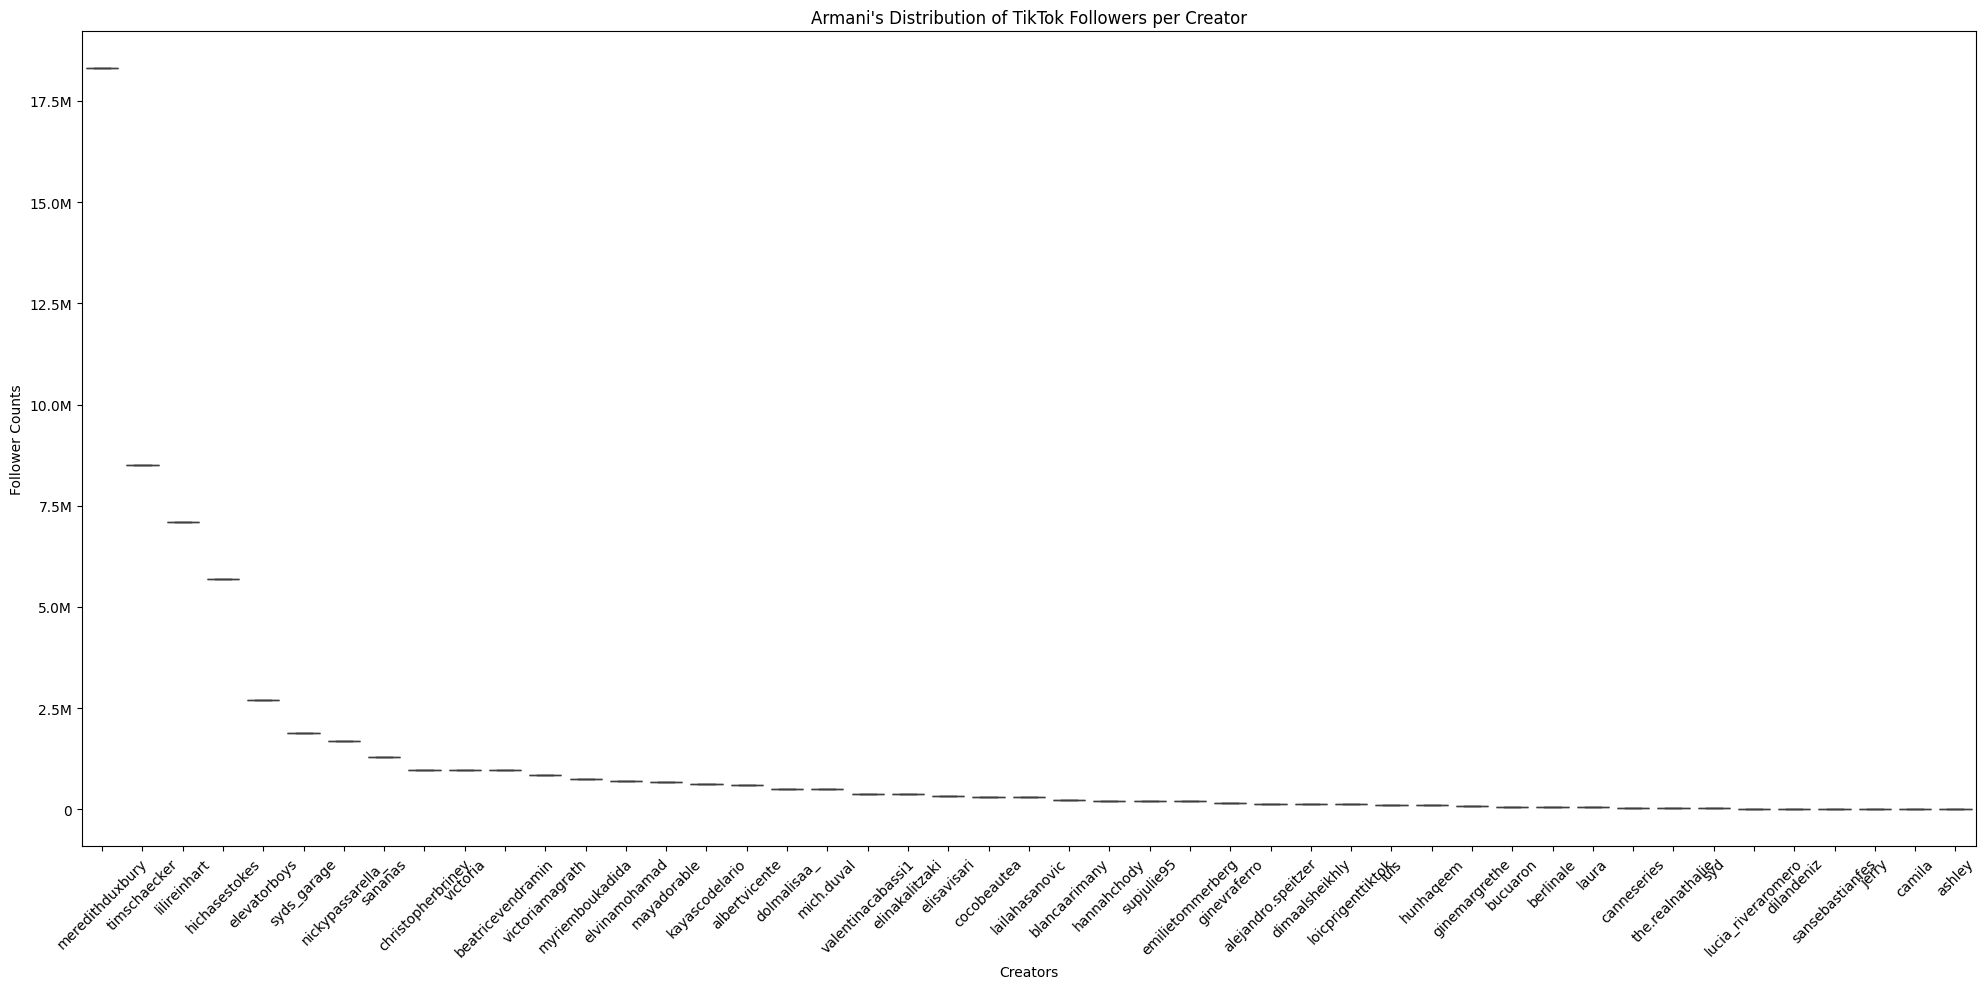

In [75]:
# Graph #1:
top_50_follwerBase = armani_meta.sort_values(by='author_followerCount', ascending=False).head(50)

plt.figure(figsize=(20, 10))
sns.boxplot(data=top_50_follwerBase, x='author_uniqueId', y='author_followerCount')
plt.title("Armani's Distribution of TikTok Followers per Creator")
plt.xlabel("Creators")
plt.ylabel("Follower Counts")
plt.xticks(rotation=45)
formatter = FuncFormatter(reformat)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()



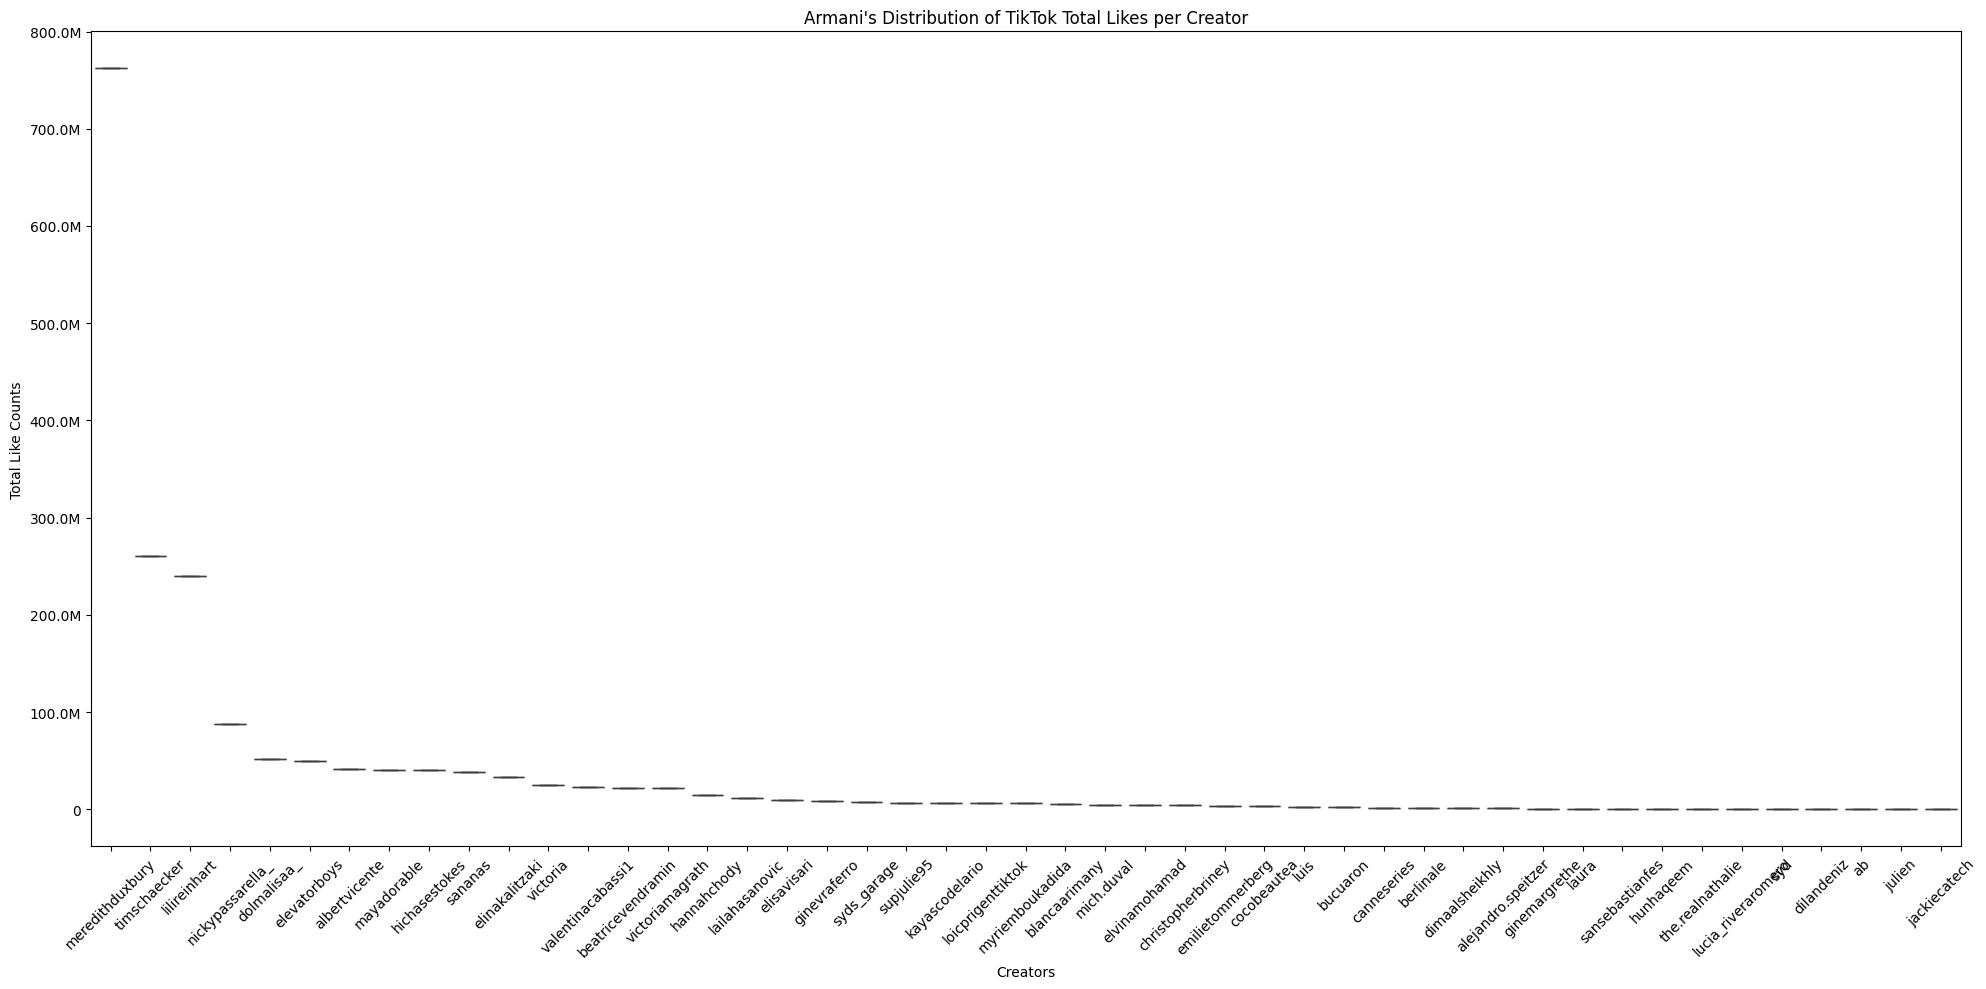

In [74]:
# Graph #2:
top_50_heart = armani_meta.sort_values(by='author_heartCount', ascending=False).head(50)

plt.figure(figsize=(20, 10))
sns.boxplot(data=top_50_heart, x='author_uniqueId', y='author_heartCount')
plt.title("Armani's Distribution of TikTok Total Likes per Creator")
plt.xlabel("Creators")
plt.ylabel("Total Like Counts")
plt.xticks(rotation=45)
formatter = FuncFormatter(reformat)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

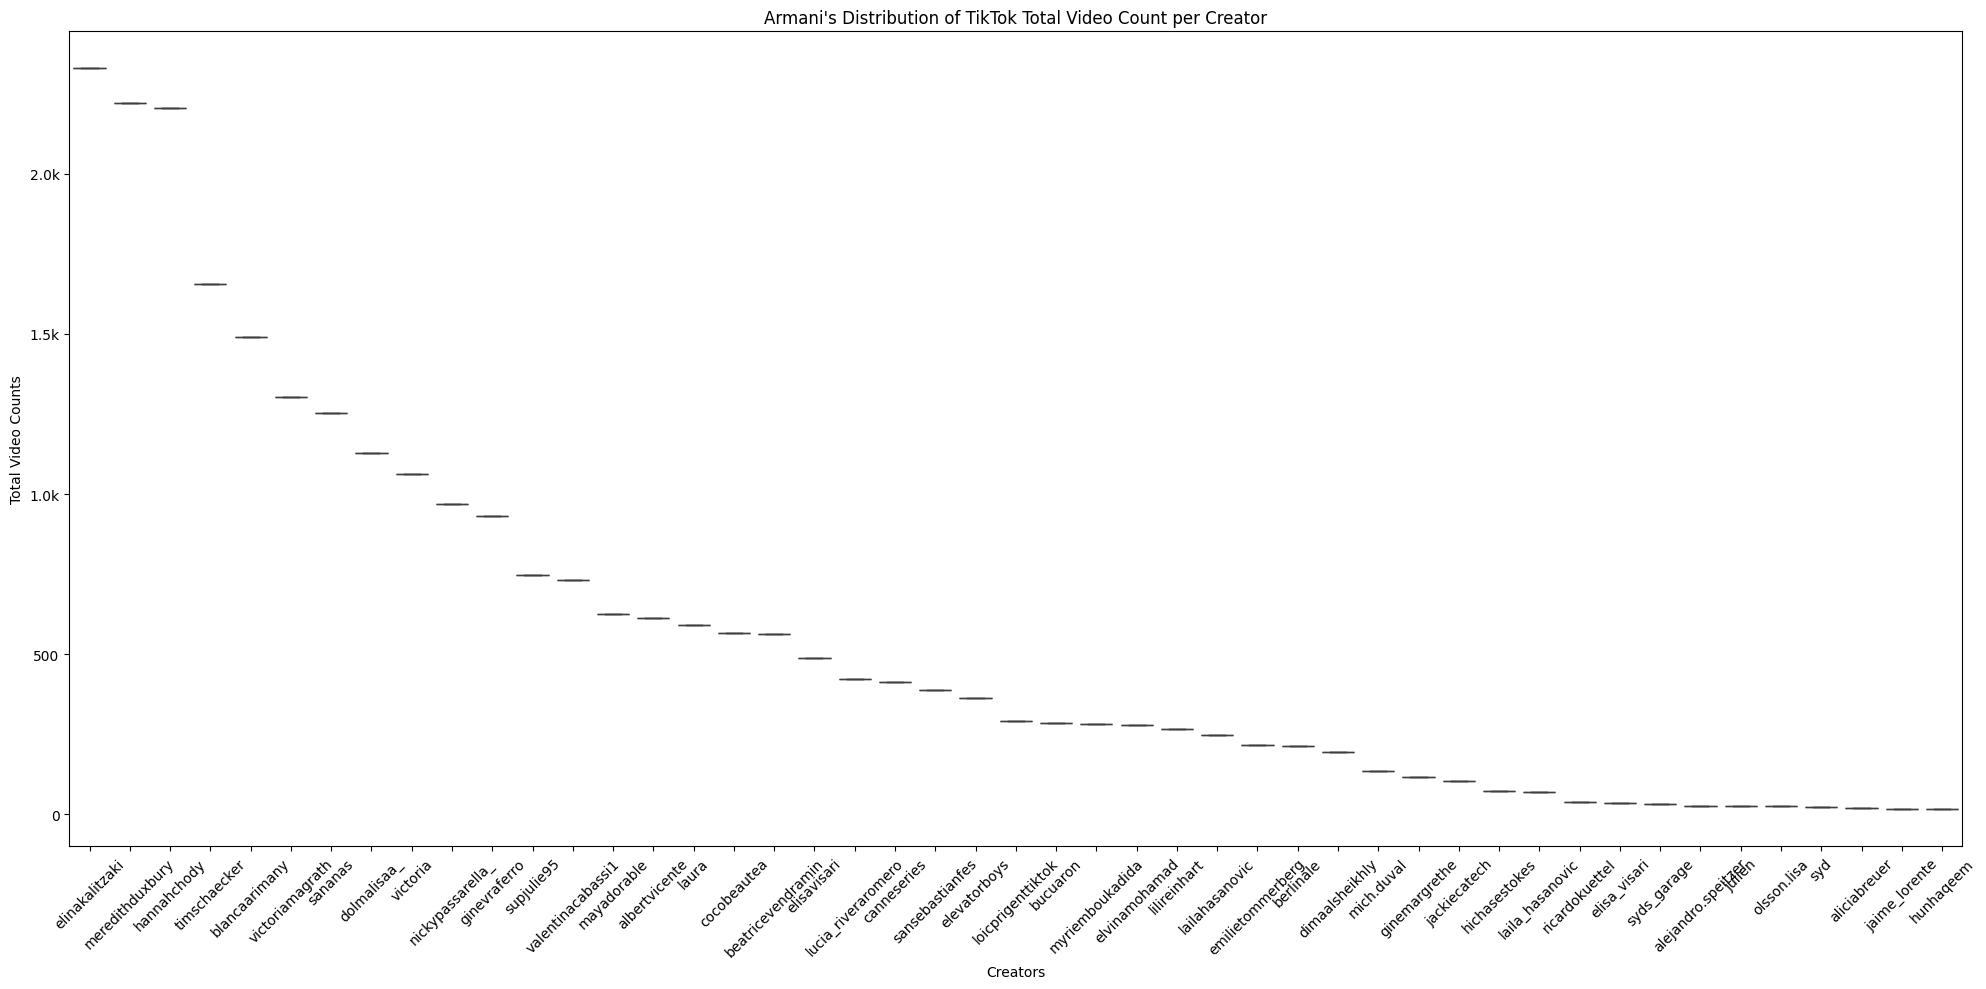

In [76]:
# Graph #3:
top_50_vidCt = armani_meta.sort_values(by='author_videoCount', ascending=False).head(50)

plt.figure(figsize=(20, 10))
sns.boxplot(data=top_50_vidCt, x='author_uniqueId', y='author_videoCount')
plt.title("Armani's Distribution of TikTok Total Video Count per Creator")
plt.xlabel("Creators")
plt.ylabel("Total Video Counts")
plt.xticks(rotation=45)
formatter = FuncFormatter(reformat)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [50]:
elf_meta1, elf_error1 = collect_user_metadata(unique_urls, elfyeah, replace_char='_')
elf_subset1 = elfyeah.loc[elf_error1['index']].drop_duplicates()

elf_meta2, elf_error2 = collect_user_metadata(unique_urls, elf_subset1, replace_char='')
elf_subset2 = elfyeah.loc[elf_error2['index']].drop_duplicates()

elf_meta3, elf_error3 = collect_user_metadata(unique_urls, elf_subset2, replace_char='.')

elf_meta = pd.concat([elf_meta1, elf_meta2, elf_meta3], ignore_index=True).drop_duplicates()

Processing: https://www.tiktok.com/@chipotle
Extracted: {'url': 'https://www.tiktok.com/@chipotle', 'author_id': '6646487634225135622', 'author_uniqueId': 'chipotle', 'author_nickname': 'Chipotle', 'author_verified': True, 'author_followerCount': 2600000, 'author_followingCount': 272, 'author_heartCount': 59800000, 'author_videoCount': 637, 'author_diggCount': 5206, 'author_isADVirtual': False, 'author_ttSeller': False}
Processing: https://www.tiktok.com/@avani
Extracted: {'url': 'https://www.tiktok.com/@avani', 'author_id': '79609045006872576', 'author_uniqueId': 'avani', 'author_nickname': 'avani', 'author_verified': True, 'author_followerCount': 41800000, 'author_followingCount': 4819, 'author_heartCount': -1111093819, 'author_videoCount': 1095, 'author_diggCount': 0, 'author_isADVirtual': False, 'author_ttSeller': False}
Processing: https://www.tiktok.com/@Celine
Extracted: {'url': 'https://www.tiktok.com/@Celine', 'author_id': '6815932359487554566', 'author_uniqueId': 'celine', 'a

In [80]:
# pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)

# Ensure the content of each column is fully visible
pd.set_option('display.max_colwidth', None)

In [82]:
# elf_error1

In [54]:
esteelauder_meta1, esteelauder_error1 = collect_user_metadata(unique_urls, esteelauder, replace_char='_')
esteelauder_subset1 = esteelauder.loc[esteelauder_error1['index']].drop_duplicates()

esteelauder_meta2, esteelauder_error2 = collect_user_metadata(unique_urls, esteelauder_subset1, replace_char='')
esteelauder_subset2 = esteelauder.loc[esteelauder_error2['index']].drop_duplicates()

esteelauder_meta3, esteelauder_error3 = collect_user_metadata(unique_urls, esteelauder_subset2, replace_char='.')

esteelauder_meta = pd.concat([esteelauder_meta1, esteelauder_meta2, esteelauder_meta3], ignore_index=True).drop_duplicates()

Processing: https://www.tiktok.com/@Amber_Marie
Extracted: {'url': 'https://www.tiktok.com/@Amber_Marie', 'author_id': '6981156002025161734', 'author_uniqueId': 'amber_marie', 'author_nickname': 'amber🦈', 'author_verified': False, 'author_followerCount': 74, 'author_followingCount': 69, 'author_heartCount': 2372, 'author_videoCount': 0, 'author_diggCount': 0, 'author_isADVirtual': False, 'author_ttSeller': False}
Processing: https://www.tiktok.com/@Awuoi_Matiop
Error processing https://www.tiktok.com/@Awuoi_Matiop: 'userInfo'
Processing: https://www.tiktok.com/@dacey
Error processing https://www.tiktok.com/@dacey: 'userInfo'
Processing: https://www.tiktok.com/@Tanisha
Extracted: {'url': 'https://www.tiktok.com/@Tanisha', 'author_id': '4329', 'author_uniqueId': 'tanisha', 'author_nickname': 'Tanisha💘', 'author_verified': False, 'author_followerCount': 1036, 'author_followingCount': 1, 'author_heartCount': 2, 'author_videoCount': 0, 'author_diggCount': 0, 'author_isADVirtual': False, 'au

In [55]:
maybelline_meta1, maybelline_error1 = collect_user_metadata(unique_urls, maybelline, replace_char='_')
maybelline_subset1 = maybelline.loc[maybelline_error1['index']].drop_duplicates()

maybelline_meta2, maybelline_error2 = collect_user_metadata(unique_urls, maybelline_subset1, replace_char='')
maybelline_subset2 = maybelline.loc[maybelline_error2['index']].drop_duplicates()

maybelline_meta3, maybelline_error3 = collect_user_metadata(unique_urls, maybelline_subset2, replace_char='.')

maybelline_meta = pd.concat([maybelline_meta1, maybelline_meta2, maybelline_meta3], ignore_index=True).drop_duplicates()

Processing: https://www.tiktok.com/@Nathalie
Extracted: {'url': 'https://www.tiktok.com/@Nathalie', 'author_id': '6519750488622109696', 'author_uniqueId': 'nathalie', 'author_nickname': 'Nathalie förebild ❤️❤️❤️', 'author_verified': False, 'author_followerCount': 229, 'author_followingCount': 7, 'author_heartCount': 737, 'author_videoCount': 2, 'author_diggCount': 0, 'author_isADVirtual': False, 'author_ttSeller': False}
Processing: https://www.tiktok.com/@Tom_Chief
Error processing https://www.tiktok.com/@Tom_Chief: 'userInfo'
Processing: https://www.tiktok.com/@TCS_New
Error processing https://www.tiktok.com/@TCS_New: 'userInfo'
Processing: https://www.tiktok.com/@New_York
Extracted: {'url': 'https://www.tiktok.com/@New_York', 'author_id': '7496304036402234375', 'author_uniqueId': 'new_york', 'author_nickname': 'zapirus', 'author_verified': False, 'author_followerCount': 41, 'author_followingCount': 97, 'author_heartCount': 0, 'author_videoCount': 0, 'author_diggCount': 0, 'author_is

In [57]:
milk_meta1, milk_error1 = collect_user_metadata(unique_urls, milkmakeup, replace_char='_')
milk_subset1 = milkmakeup.loc[milk_error1['index']].drop_duplicates()

milk_meta2, milk_error2 = collect_user_metadata(unique_urls, milk_subset1, replace_char='')
milk_subset2 = milkmakeup.loc[milk_error2['index']].drop_duplicates()

milk_meta3, milk_error3 = collect_user_metadata(unique_urls, milk_subset2, replace_char='.')

milk_meta = pd.concat([milk_meta1, milk_meta2, milk_meta3], ignore_index=True).drop_duplicates()

Processing: https://www.tiktok.com/@Schaebreezy_
Extracted: {'url': 'https://www.tiktok.com/@Schaebreezy_', 'author_id': '6797240466750882821', 'author_uniqueId': 'schaebreezy_', 'author_nickname': 'Schaebreezy_', 'author_verified': False, 'author_followerCount': 39800, 'author_followingCount': 818, 'author_heartCount': 1400000, 'author_videoCount': 764, 'author_diggCount': 0, 'author_isADVirtual': False, 'author_ttSeller': False}
Processing: https://www.tiktok.com/@sephora
Extracted: {'url': 'https://www.tiktok.com/@sephora', 'author_id': '279484737629323264', 'author_uniqueId': 'sephora', 'author_nickname': 'sephora', 'author_verified': True, 'author_followerCount': 1800000, 'author_followingCount': 384, 'author_heartCount': 26100000, 'author_videoCount': 2732, 'author_diggCount': 0, 'author_isADVirtual': False, 'author_ttSeller': False}
Processing: https://www.tiktok.com/@sephora.
Extracted: {'url': 'https://www.tiktok.com/@sephora.', 'author_id': '7023150227809092614', 'author_uniq

In [58]:
nyx_meta1, nyx_error1 = collect_user_metadata(unique_urls, nyxcosmetics, replace_char='_')
nyx_subset1 = nyxcosmetics.loc[nyx_error1['index']].drop_duplicates()

nyx_meta2, nyx_error2 = collect_user_metadata(unique_urls, nyx_subset1, replace_char='')
nyx_subset2 = nyxcosmetics.loc[nyx_error2['index']].drop_duplicates()

nyx_meta3, nyx_error3 = collect_user_metadata(unique_urls, nyx_subset2, replace_char='.')

nyx_meta = pd.concat([nyx_meta1, nyx_meta2, nyx_meta3], ignore_index=True).drop_duplicates()

Processing: https://www.tiktok.com/@Ivette
Error processing https://www.tiktok.com/@Ivette: list index out of range
Processing: https://www.tiktok.com/@Lilly
Error processing https://www.tiktok.com/@Lilly: list index out of range
Processing: https://www.tiktok.com/@𝐌𝐢𝐥𝐞𝐬
Error processing https://www.tiktok.com/@𝐌𝐢𝐥𝐞𝐬: list index out of range
Processing: https://www.tiktok.com/@miabgalvan
Error processing https://www.tiktok.com/@miabgalvan: list index out of range
Processing: https://www.tiktok.com/@glam_ba_
Error processing https://www.tiktok.com/@glam_ba_: list index out of range
Processing: https://www.tiktok.com/@Roussie_official
Error processing https://www.tiktok.com/@Roussie_official: list index out of range
Processing: https://www.tiktok.com/@Alexis_Conway
Error processing https://www.tiktok.com/@Alexis_Conway: list index out of range
Processing: https://www.tiktok.com/@Andrea
Error processing https://www.tiktok.com/@Andrea: list index out of range
Processing: https://www.tiktok

KeyboardInterrupt: 

In [ ]:
import pandas as pd

In [71]:
## Armani Beauty
armani2021 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/armani2021_urls/metadata.csv')
armani2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/armani2022_urls/metadata.csv')
armani2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/armani2023_urls/metadata.csv')
armani2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/armani2024_urls/metadata.csv')

ArmaniBeautyAds = pd.concat([armani2021, armani2022, armani2023, armani2024], ignore_index=True)

In [72]:
## Elf Cosmetics
elf2020 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/elf2020_urls/metadata.csv')
elf2021 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/elf2021_urls/metadata.csv')
elf2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/elf2022_urls/metadata.csv')
elf2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/elf2023_urls/metadata.csv')
elf2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/elf2024_urls/metadata.csv')

ElfCosmeticsAds = pd.concat([elf2020, elf2021, elf2022, elf2023, elf2024], ignore_index=True)

In [73]:
## Estee Partner Hashtag
estee2020 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/estee2020_urls/metadata.csv')
estee2021 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/estee2021_urls/metadata.csv')
estee2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/estee2022_urls/metadata.csv')
estee2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/estee2023_urls/metadata.csv')
estee2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/estee2024_urls/metadata.csv')

EsteeAds = pd.concat([estee2020, estee2021, estee2022, estee2023, estee2024], ignore_index=True)

In [74]:
## Estee Lauder Partner Hashtag
esteelauder2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/esteelauder2022_urls/metadata.csv')
esteelauder2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/esteelauder2023_urls/metadata.csv')
esteelauder2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/esteelauder2024_urls/metadata.csv')

EsteeLauderAds = pd.concat([esteelauder2022, esteelauder2023, esteelauder2024], ignore_index=True)

In [75]:
## Maybelline Partner Hashtag
maybelline2020 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/maybelline2020_urls/metadata.csv')
maybelline2021 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/maybelline2021_urls/metadata.csv')
maybelline2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/maybelline2022_urls/metadata.csv')
maybelline2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/maybelline2023_urls/metadata.csv')

MaybellineAds = pd.concat([maybelline2020, maybelline2021, maybelline2022, maybelline2023], ignore_index=True)

In [76]:
## Milk Partner Hashtag
milk2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/milk2022_urls/metadata.csv')
milk2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/milk2023_urls/metadata.csv')
milk2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/milk2024_urls/metadata.csv')

MilkAds = pd.concat([milk2022, milk2023, milk2024], ignore_index=True)

In [77]:
## NYX Partner Hashtag
nyx2020 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/nyx2020_urls/metadata.csv')
nyx2021 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/nyx2021_urls/metadata.csv')
nyx2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/nyx2022_urls/metadata.csv')
nyx2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/nyx2023_urls/metadata.csv')
nyx2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/nyx2024_urls/metadata.csv')

NyxAds = pd.concat([nyx2020, nyx2021, nyx2022, nyx2023, nyx2024], ignore_index=True)

In [78]:
## NYX Partner (pt2) Hashtag
nyxpartner2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/nyxpartner2022_urls/metadata.csv')
nyxpartner2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/nyxpartner2023_urls/metadata.csv')
nyxpartner2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/nyxpartner2024_urls/metadata.csv')

NyxPartnerAds = pd.concat([nyx2022, nyx2023, nyx2024], ignore_index=True)

In [97]:
## Rare Partner Hashtag
rare2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/rare2022_urls/metadata.csv')
rare2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/rare2023_urls/metadata.csv')
rare2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/rare2024_urls/metadata.csv')

RareAds = pd.concat([rare2022, rare2023, rare2024], ignore_index=True)

In [96]:
## Saie Partner Hashtag
saie2021 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/saie2021_urls/metadata.csv')
saie2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/saie2022_urls/metadata.csv')
saie2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/saie2023_urls/metadata.csv')
saie2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/saie2024_urls/metadata.csv')

SaieAds = pd.concat([saie2021, saie2022, saie2023, saie2024], ignore_index=True)

In [132]:
## Saie Partner (pt2) Hashtag
saiebeauty2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/saiebeauty2022_urls/metadata.csv')
saiebeauty2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/saiebeauty2023_urls/metadata.csv')
saiebeauty2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/saiebeauty2024_urls/metadata.csv')

SaiebeautyAds = pd.concat([saiebeauty2022, saiebeauty2023, saiebeauty2024], ignore_index=True)

In [81]:
## Topicals Partner Hashtag
topicals2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/topicals2022_urls/metadata.csv')
topicals2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/topicals2023_urls/metadata.csv')
topicals2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/topicals2024_urls/metadata.csv')

TopicalsAds = pd.concat([topicals2022, topicals2023, topicals2024], ignore_index=True)

In [82]:
## Wonderskin Partner Hashtag
wonderskin2021 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/wonderskin2021_urls/metadata.csv')
wonderskin2022 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/wonderskin2022_urls/metadata.csv')
wonderskin2023 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/wonderskin2023_urls/metadata.csv')
wonderskin2024 = pd.read_csv('/Users/sooahnlee/Downloads/pyktok_video/metadata/wonderskin2024_urls/metadata.csv')

WonderskinAds = pd.concat([wonderskin2021, wonderskin2022, wonderskin2023, wonderskin2024], ignore_index=True)

In [139]:
author_info_cols = [
    'author_id', 'author_uniqueId', 'author_nickname', 'author_verified',
    'author_followerCount', 'author_followingCount',
    'author_heartCount', 'author_videoCount', 'author_diggCount'
]

video_stats_cols = [
    'diggCount', 'shareCount', 'commentCount',
    'playCount', 'collectCount', 'repostCount'
]

# Group by unique author ID and compute mean of video stats
author_avg_stats = (WonderskinAds.groupby('author_uniqueId')[video_stats_cols].mean().reset_index())

# Get the first seen author info per unique author
author_info = (WonderskinAds[author_info_cols].drop_duplicates(subset='author_uniqueId'))

# Merge the two on author_uniqueId
WonderskinAds_creator = pd.merge(author_info, author_avg_stats, on='author_uniqueId', how='inner')

In [111]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [140]:
# ArmaniBeautyAds_creator
# ElfCosmeticsAds_creator
# EsteeAds_creator
# EsteeLauderAds_creator
# MaybellineAds_creator
# MilkAds_creator
# NyxAds_creator
# NyxPartnerAds_creator
# RareAds_creator
# SaieAds_creator
# SaiebeautyAds_creator
# TopicalsAds_creator
# WonderskinAds_creator

In [110]:
def reformat(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}k'
    else:
        return str(int(x))

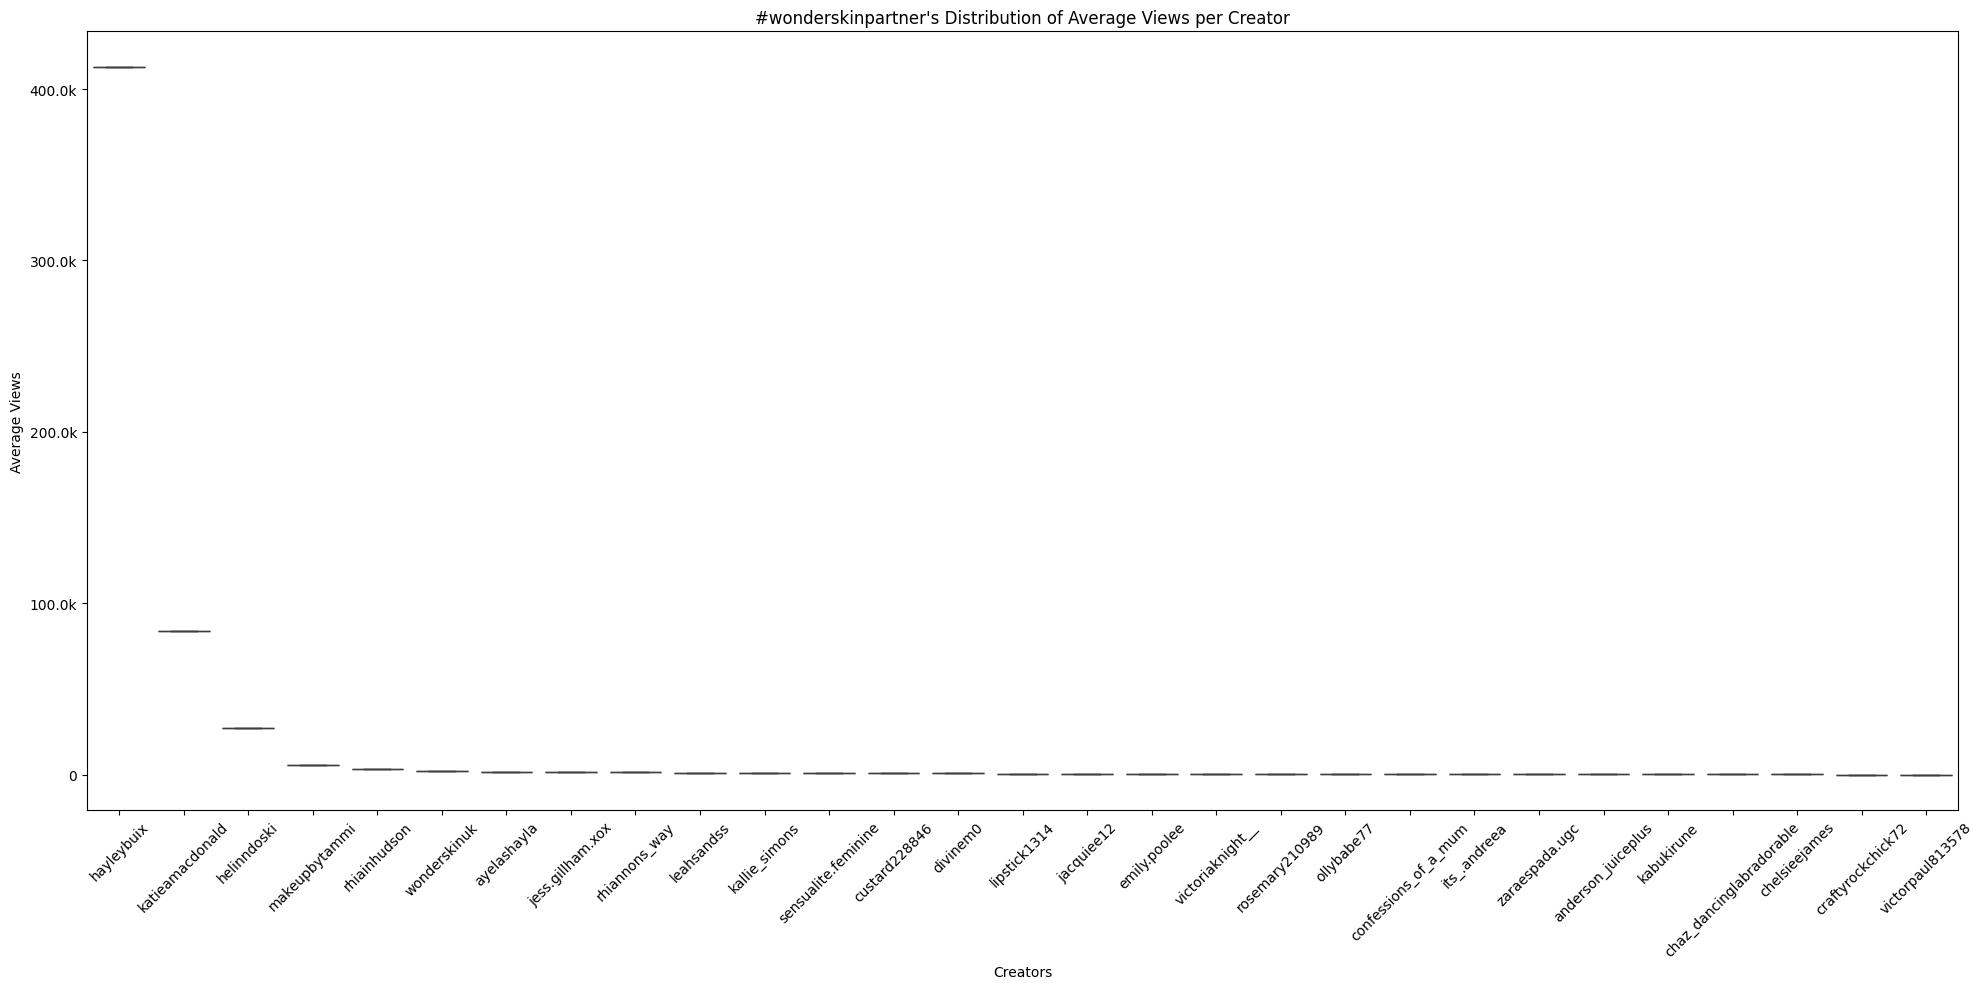

In [158]:
# Graph #1:
top_50_users = WonderskinAds_creator.sort_values(by='playCount', ascending=False).head(50)

plt.figure(figsize=(20, 10))
sns.boxplot(data=top_50_users, x='author_uniqueId', y='playCount')
plt.title("#wonderskinpartner's Distribution of Average Views per Creator")
plt.xlabel("Creators")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
formatter = FuncFormatter(reformat)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

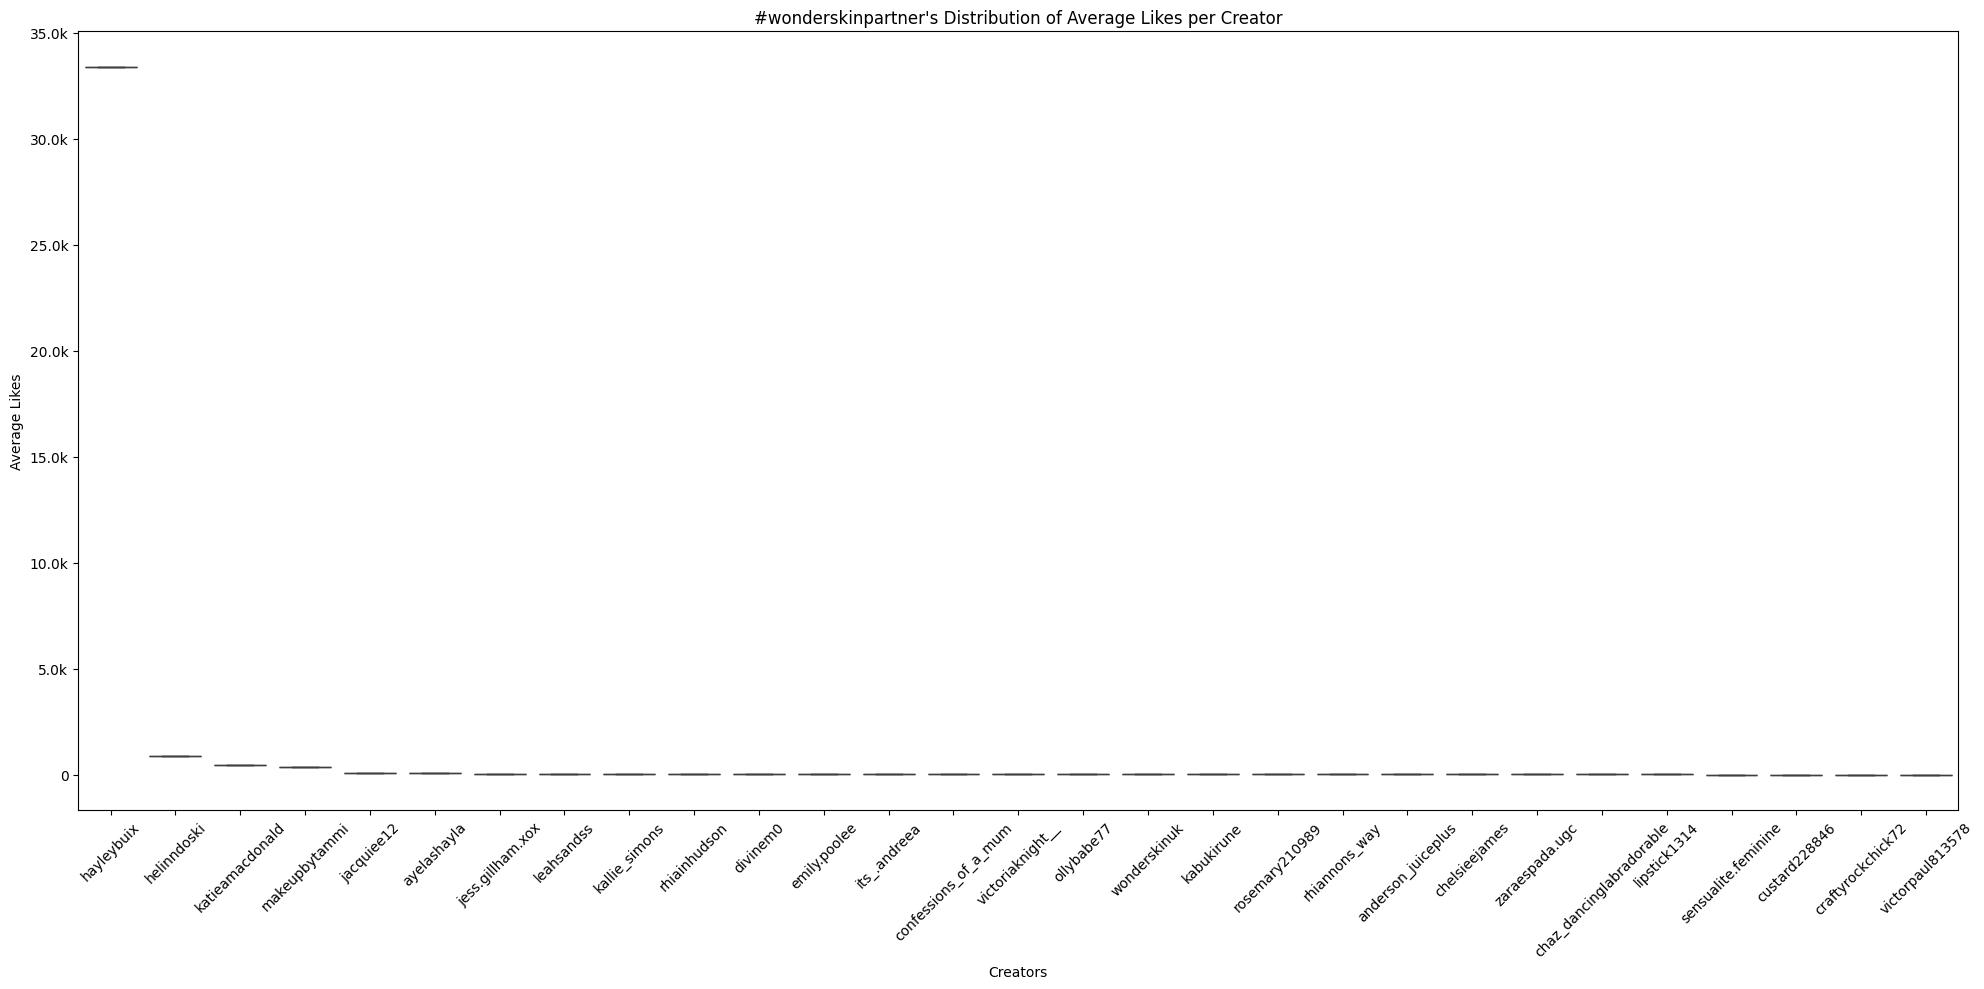

In [157]:
# Graph #2:
top_50_users = WonderskinAds_creator.sort_values(by='diggCount', ascending=False).head(50)

plt.figure(figsize=(20, 10))
sns.boxplot(data=top_50_users, x='author_uniqueId', y='diggCount')
plt.title("#wonderskinpartner's Distribution of Average Likes per Creator")
plt.xlabel("Creators")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
formatter = FuncFormatter(reformat)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

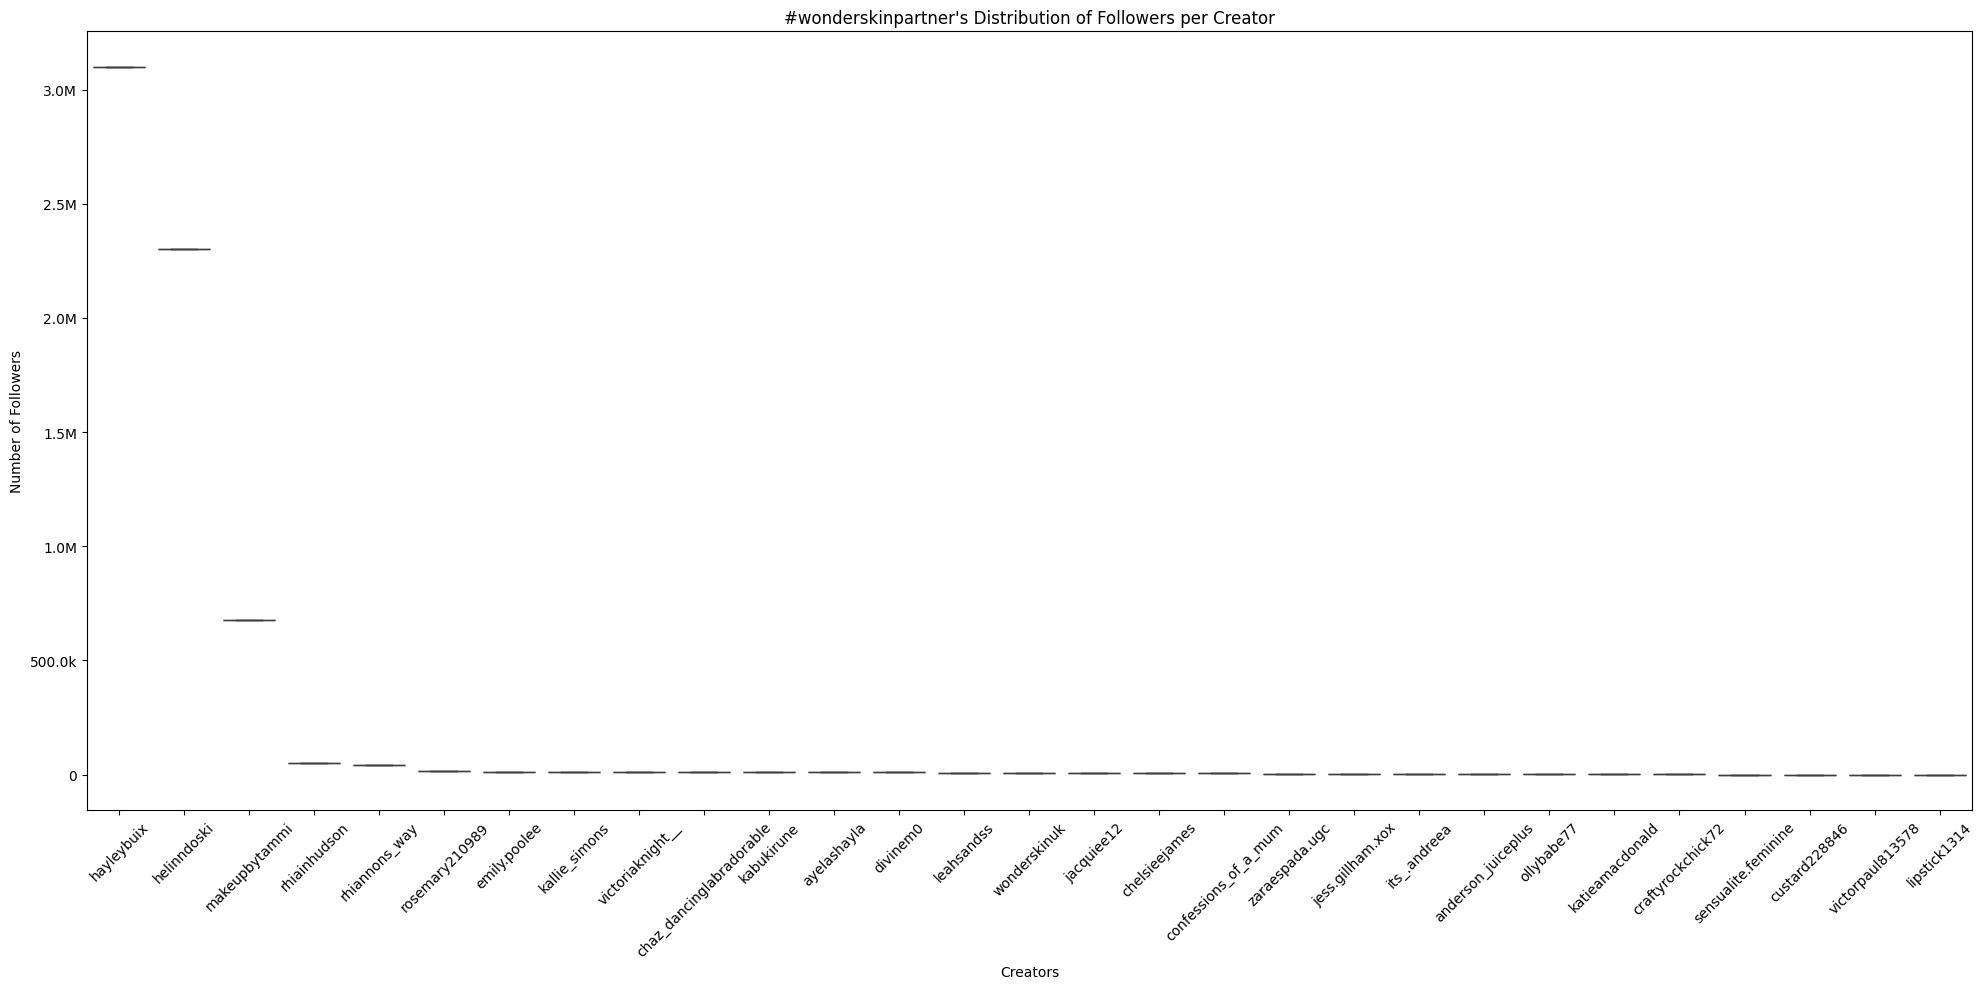

In [174]:
# Graph #3:
top_50_users = WonderskinAds_creator.sort_values(by='author_followerCount', ascending=False).head(50)

plt.figure(figsize=(20, 10))
sns.boxplot(data=top_50_users, x='author_uniqueId', y='author_followerCount')
plt.title("#wonderskinpartner's Distribution of Followers per Creator")
plt.xlabel("Creators")
plt.ylabel("Number of Followers")
plt.xticks(rotation=45)
formatter = FuncFormatter(reformat)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [2]:
import os
import pandas as pd

In [83]:
## YEAR 2020
elfpartner_2020 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2020data/elfpartner_2020.csv')
esteepartner_2020 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2020data/esteepartner_2020.csv')
maybellinepartner_2020 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2020data/maybellinepartner_2020.csv')
nyxcosmeticspartner_2020 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2020data/nyxcosmeticspartner_2020.csv')

## YEAR 2021
armanibeautypartner_2021 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2021data/armanibeautypartner_2021.csv')
elfpartner_2021 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2021data/elfpartner_2021.csv')
esteepartner_2021 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2021data/esteepartner_2021.csv')
maybellinepartner_2021 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2021data/nyxcosmeticspartner_2021.csv')
nyxcosmeticspartner_2021 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2021data/nyxcosmeticspartner_2021.csv')
saiepartner_2021 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2021data/saiepartner_2021.csv')
wonderskinpartner_2021 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2021data/wonderskinpartner_2021.csv')

## YEAR 2022
armanibeautypartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/armanibeautypartner_2022.csv')
elfpartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/elfpartner_2022.csv')
esteelauderpartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/esteelauderpartner_2022.csv')
esteepartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/esteepartner_2022.csv')
maybellinepartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/maybellinepartner_2022.csv')
milkmakeuppartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/milkmakeuppartner_2022.csv')
nyxcosmeticspartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/nyxcosmeticspartner_2022.csv')
nyxpartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/nyxpartner_2022.csv')
rarebeautypartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/rarebeautypartner_2022.csv')
saiebeautypartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/saiebeautypartner_2022.csv')
saiepartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/saiepartner_2022.csv')
topicalspartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/topicalspartner_2022.csv')
wonderskinpartner_2022 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2022data/wonderskinpartner_2022.csv')

## YEAR 2023
armanibeautypartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/armanibeautypartner_2023.csv')
elfpartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/elfpartner_2023.csv')
esteelauderpartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/esteelauderpartner_2023.csv')
esteepartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/esteepartner_2023.csv')
maybellinepartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/maybellinepartner_2023.csv')
milkmakeuppartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/milkmakeuppartner_2023.csv')
nyxcosmeticspartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/nyxcosmeticspartner_2023.csv')
nyxpartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/nyxpartner_2023.csv')
rarebeautypartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/rarebeautypartner_2023.csv')
saiebeautypartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/saiebeautypartner_2023.csv')
saiepartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/saiepartner_2023.csv')
topicalspartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/topicalspartner_2023.csv')
wonderskinpartner_2023 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2023data/wonderskinpartner_2023.csv')

## YEAR 2024 -- maybelline no longer using hashtags in 2024 from the months selected
armanibeautypartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/armanibeautypartner_2024.csv')
elfpartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/elfpartner_2024.csv')
esteelauderpartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/esteelauderpartner_2024.csv')
esteepartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/esteepartner_2024.csv')
milkmakeuppartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/milkmakeuppartner_2024.csv')
nyxcosmeticspartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/nyxcosmeticspartner_2024.csv')
nyxpartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/nyxpartner_2024.csv')
rarebeautypartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/rarebeautypartner_2024.csv')
saiebeautypartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/saiebeautypartner_2024.csv')
saiepartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/saiepartner_2024.csv')
topicalspartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/topicalspartner_2024.csv')
wonderskinpartner_2024 = pd.read_csv('/Users/sooahnlee/Desktop/CS/soo_data/soo_2024data/wonderskinpartner_2024.csv')

In [7]:
import os
import pandas as pd
import json

# Your main directory path
data_root = '/Users/sooahnlee/Desktop/CS/soo_data'
output_json_path = '/Users/sooahnlee/Desktop/CS/soo_tiktok.json'

def combine_nested_json(data_root, output_path):
    nested_data = {}

    for folder in sorted(os.listdir(data_root)):
        folder_path = os.path.join(data_root, folder)
        if not os.path.isdir(folder_path):
            continue

        # Extract year from folder name
        year = folder[-8:-4] if folder.endswith("data") and folder[-8:-4].isdigit() else "Unknown"
        if year not in nested_data:
            nested_data[year] = {}

        for file in os.listdir(folder_path):
            if file.endswith('.csv'):
                hashtag = file.replace('.csv', '')
                file_path = os.path.join(folder_path, file)

                try:
                    df = pd.read_csv(file_path)
                    if {'video_url', 'matched_hashtag', 'datetimeyear'}.issubset(df.columns):
                        entries = df[['video_url', 'datetimeyear']].to_dict(orient='records')
                        nested_data[year][hashtag] = entries
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    # Write nested structure to JSON
    with open(output_path, 'w') as f:
        json.dump(nested_data, f, indent=2)

    print(f"Nested JSON saved to: {output_path}")

# Run the function
combine_nested_json(data_root, output_json_path)

Nested JSON saved to: /Users/sooahnlee/Desktop/CS/soo_tiktok.json


In [10]:
import os
import pandas as pd
import json

# Root directory with your year folders
data_root = '/Users/sooahnlee/Desktop/CS/soo_data'

# Output directory (not under iCloud)
output_dir = '/Users/sooahnlee/Desktop/CS/soo_tiktok_jsons'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

def save_jsons_per_year(data_root, output_dir):
    for folder in sorted(os.listdir(data_root)):
        folder_path = os.path.join(data_root, folder)
        if not os.path.isdir(folder_path):
            continue

        # Extract the year from folder name (e.g., 'soo_2020data' → '2020')
        year = folder[-8:-4] if folder.endswith("data") and folder[-8:-4].isdigit() else "Unknown"
        if year == "Unknown":
            continue

        year_data = {}

        for file in os.listdir(folder_path):
            if file.endswith('.csv'):
                hashtag = file.replace('.csv', '')
                file_path = os.path.join(folder_path, file)

                try:
                    df = pd.read_csv(file_path)
                    if {'video_url', 'matched_hashtag', 'datetimeyear'}.issubset(df.columns):
                        entries = df[['video_url', 'datetimeyear']].to_dict(orient='records')
                        year_data[hashtag] = entries
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

        # Define output file path
        output_path = os.path.join(output_dir, f'soo_tiktok_{year}.json')

        # Save JSON for this year
        try:
            with open(output_path, 'w') as f:
                json.dump({year: year_data}, f, indent=2)
            print(f"Saved: {output_path}")
        except Exception as e:
            print(f"Failed to save {output_path}: {e}")

# Run the function
save_jsons_per_year(data_root, output_dir)

Saved: /Users/sooahnlee/Desktop/CS/soo_tiktok_jsons/soo_tiktok_2020.json
Saved: /Users/sooahnlee/Desktop/CS/soo_tiktok_jsons/soo_tiktok_2021.json
Saved: /Users/sooahnlee/Desktop/CS/soo_tiktok_jsons/soo_tiktok_2022.json
Saved: /Users/sooahnlee/Desktop/CS/soo_tiktok_jsons/soo_tiktok_2023.json
Saved: /Users/sooahnlee/Desktop/CS/soo_tiktok_jsons/soo_tiktok_2024.json


In [3]:
import json
import requests
from bs4 import BeautifulSoup as BS

# Load the original nested structure
with open('/Users/sooahnlee/Desktop/CS/soo_tiktok_jsons/soo_tiktok_2024.json', 'r') as f:
    nested_data = json.load(f)

# New nested results dictionary
metadata_nested = {}

# Iterate by year and hashtag
for year, hashtags in nested_data.items():
    metadata_nested[year] = {}

    for hashtag, entries in hashtags.items():
        metadata_nested[year][hashtag] = []

        for entry in entries:
            comurl = entry['video_url']
            print(f"Processing: {comurl}")

            try:
                req = requests.get(comurl)
                while req.status_code != 200:
                    req = requests.get(comurl)

                soup = BS(req.content, 'html.parser')
                scripts = soup.find_all('script')

                data = json.loads(scripts[6].text)

                item = data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]

                result = {
                    "video_url": comurl,
                    "datetimeyear": entry['datetimeyear'],  # preserve original
                    "uniqueId": item["author"]["uniqueId"],
                    "video_id": item["id"],
                    "authorUsername": item["author"]["uniqueId"],
                    "desc": item["desc"],
                    "diggCount": item["stats"]["diggCount"],
                    "shareCount": item["stats"]["shareCount"],
                    "commentCount": item["stats"]["commentCount"],
                    "playCount": item["stats"]["playCount"],
                    "locationCreated": item.get("locationCreated", "NA"),
                    "isAd": item["isAd"],
                    "isADVirtual": item["author"].get("isADVirtual", "NA"),
                    "ttSeller": item["author"].get("ttSeller", "NA"),
                    "diversificationLabels": item.get("diversificationLabels", []),
                    "adAuthorization": item.get("adAuthorization", "NA"),
                    "adLabelVersion": item.get("adLabelVersion", "NA"),
                    "suggestedWords": item.get("suggestedWords", []),
                    "author_followerCount": item["authorStats"]["followerCount"],
                    "author_followingCount": item["authorStats"]["followingCount"],
                    "author_heartCount": item["authorStats"]["heartCount"],
                    "author_videoCount": item["authorStats"]["videoCount"],
                    "author_diggCount": item["authorStats"]["diggCount"]
                }

                metadata_nested[year][hashtag].append(result)

            except Exception as e:
                print(f"Error processing {comurl}: {e}")
                continue

# Save the nested metadata structure
with open('/Users/sooahnlee/Desktop/CS/soo_metadata_2024.json', 'w') as f:
    json.dump(metadata_nested, f, indent=2)

print("Metadata saved.")

Processing: https://www.tiktok.com/@holasoydivam/video/7331500911002455338
Processing: https://www.tiktok.com/@ab.hightower/video/7331482960568388907
Processing: https://www.tiktok.com/@ugc.imasha/video/7331461812853984555
Processing: https://www.tiktok.com/@holasoydivam/video/7331454566866750762
Processing: https://www.tiktok.com/@charsevilla/video/7331446171950533930
Processing: https://www.tiktok.com/@awakeningalexis/video/7331436131042577694
Processing: https://www.tiktok.com/@vxjk/video/7331207825554722090
Processing: https://www.tiktok.com/@_acabella/video/7331192503007300895
Processing: https://www.tiktok.com/@mahekswrld/video/7331179833600281899
Processing: https://www.tiktok.com/@elenasirenko_/video/7331108063987928362
Processing: https://www.tiktok.com/@dkwashington/video/7331087952166128939
Processing: https://www.tiktok.com/@marissatapiz/video/7331056699144539435
Processing: https://www.tiktok.com/@aphrose_/video/7331056333359222058
Processing: https://www.tiktok.com/@baipo

In [4]:
import json
import os

# Define paths to your individual year files
input_files = [
    '/Users/sooahnlee/Desktop/CS/soo_metadata_2020.json',
    '/Users/sooahnlee/Desktop/CS/soo_metadata_2021.json',
    '/Users/sooahnlee/Desktop/CS/soo_metadata_2022.json',
    '/Users/sooahnlee/Desktop/CS/soo_metadata_2023.json',
    '/Users/sooahnlee/Desktop/CS/soo_metadata_2024.json'
]

# Output path
output_path = '/Users/sooahnlee/Desktop/CS/soo_metadata_2020_2024.json'

# Container for all years
combined_data = {}

# Loop through each JSON file and merge
for file_path in input_files:
    with open(file_path, 'r') as f:
        data = json.load(f)
        combined_data.update(data)

# Save combined JSON
with open(output_path, 'w') as f:
    json.dump(combined_data, f, indent=2)

print(f"Combined JSON saved to: {output_path}")


Combined JSON saved to: /Users/sooahnlee/Desktop/CS/soo_metadata_2020_2024.json


✅ Flattened CSV saved to: /Users/sooahnlee/Desktop/CS/soo_metadata_2020_2024.csv


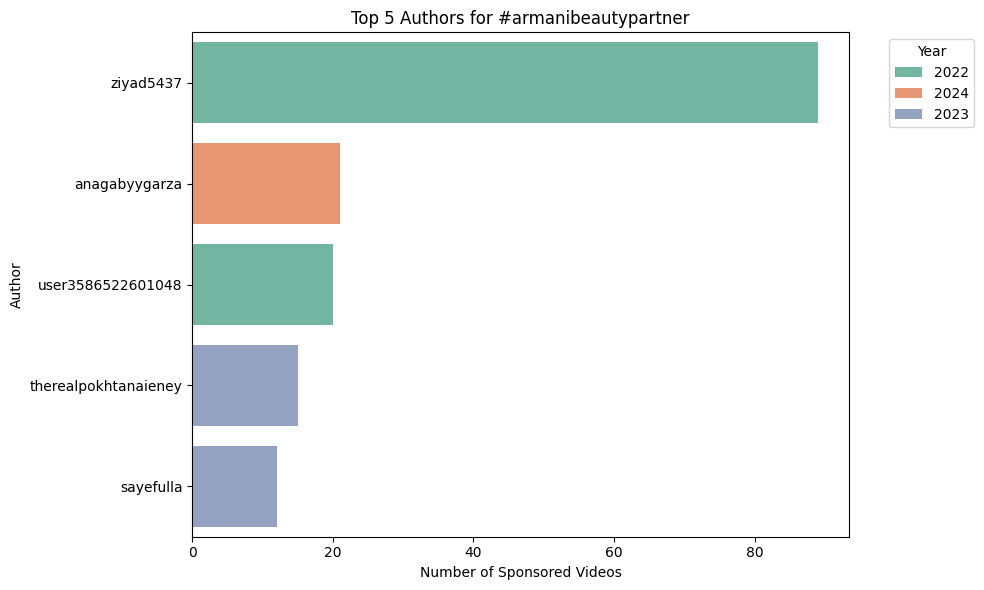

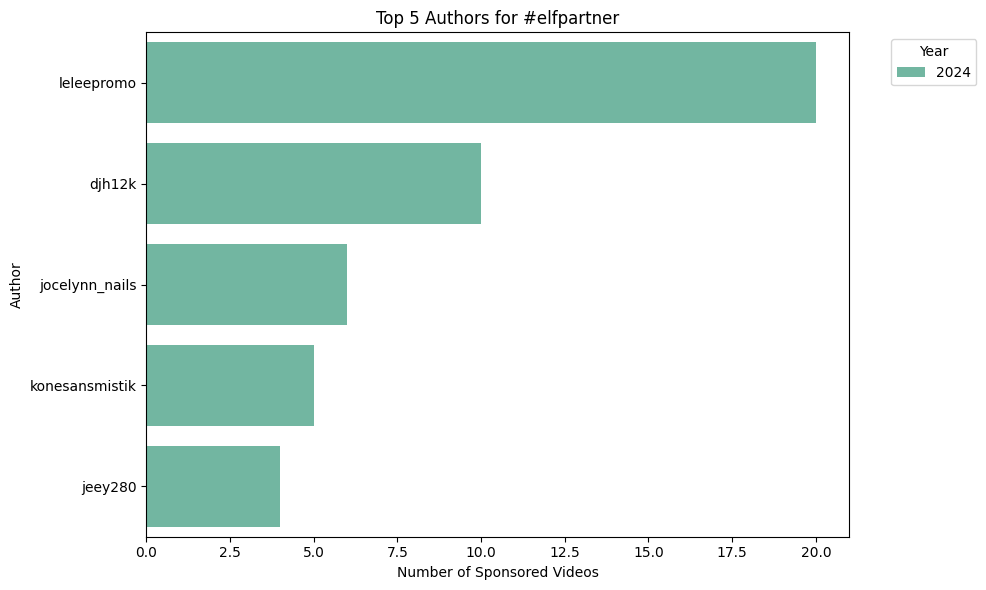

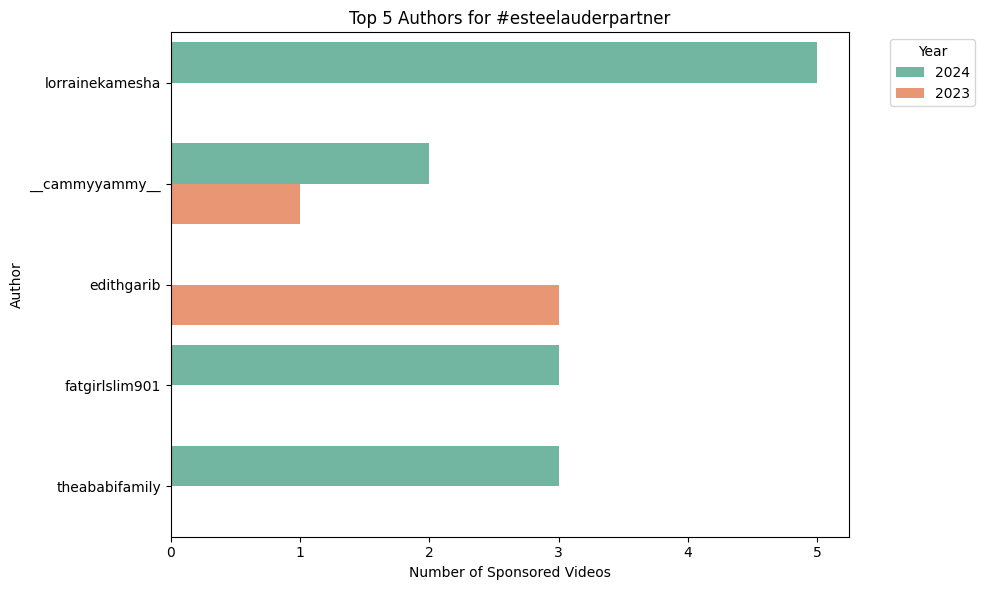

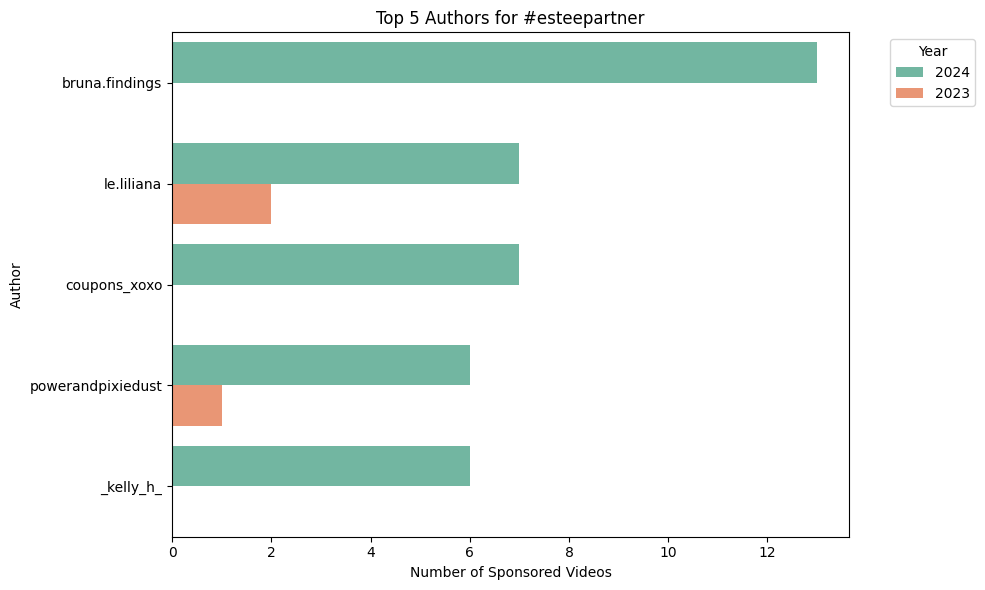

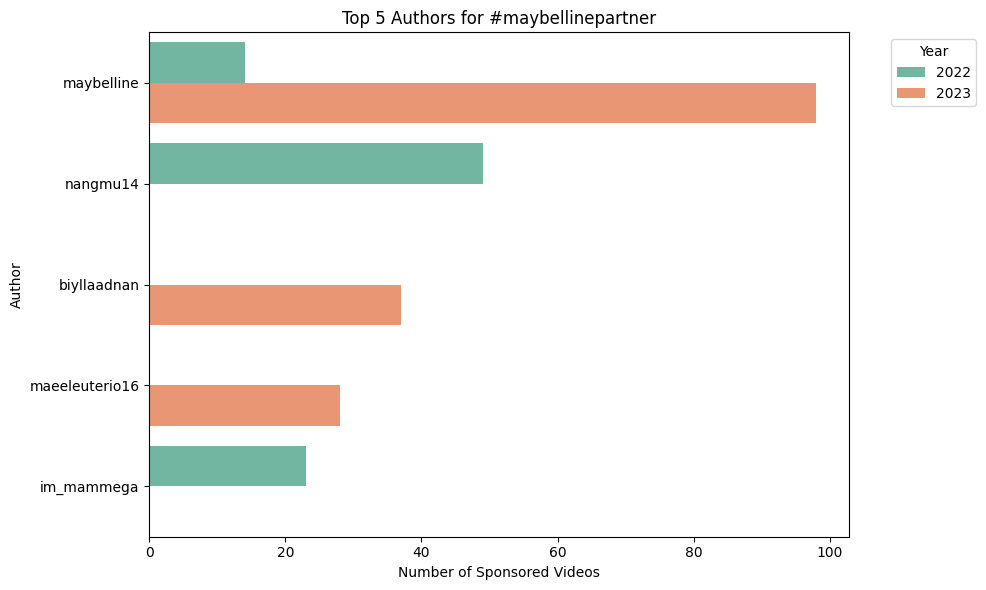

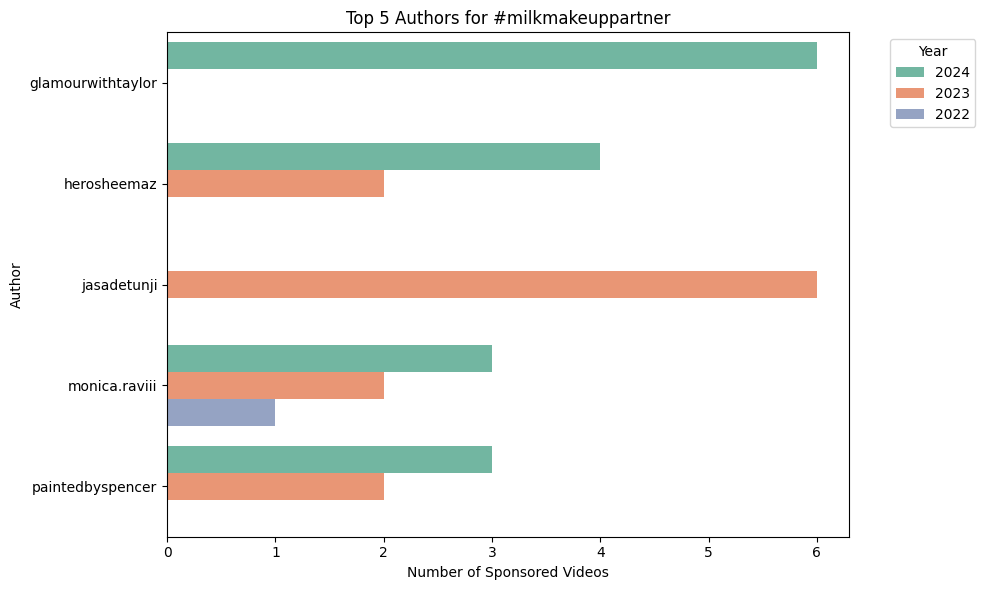

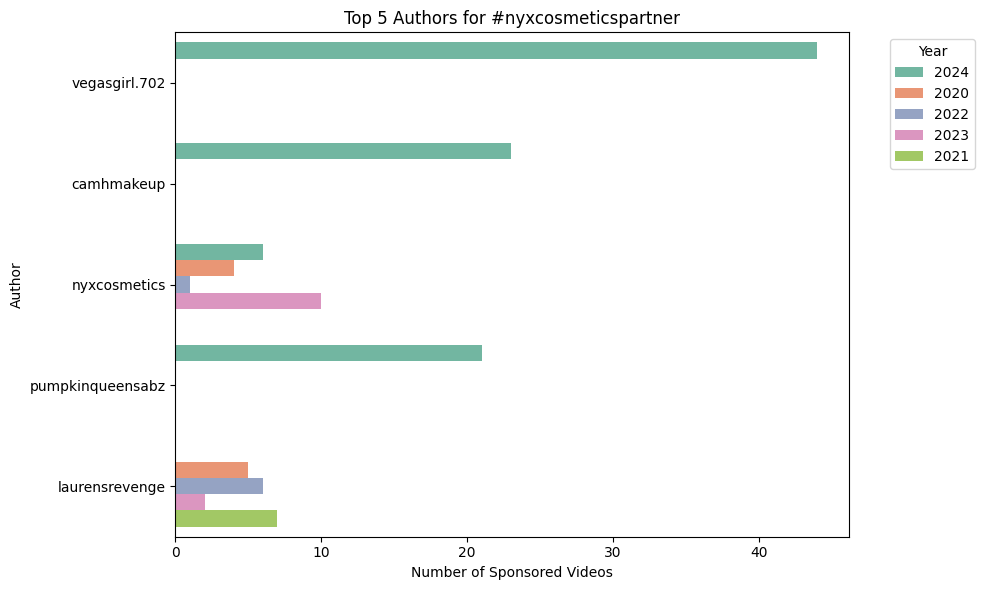

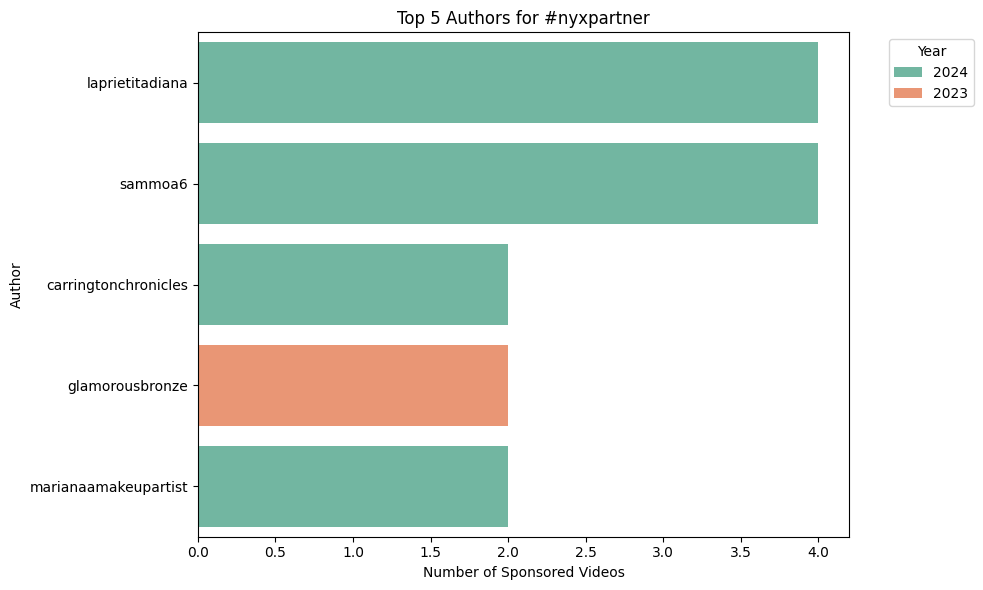

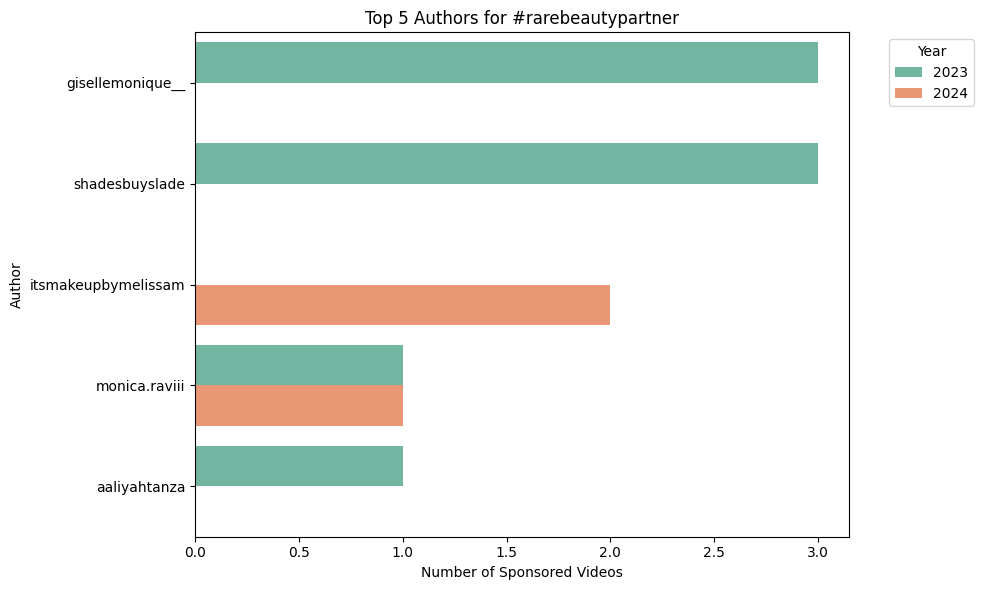

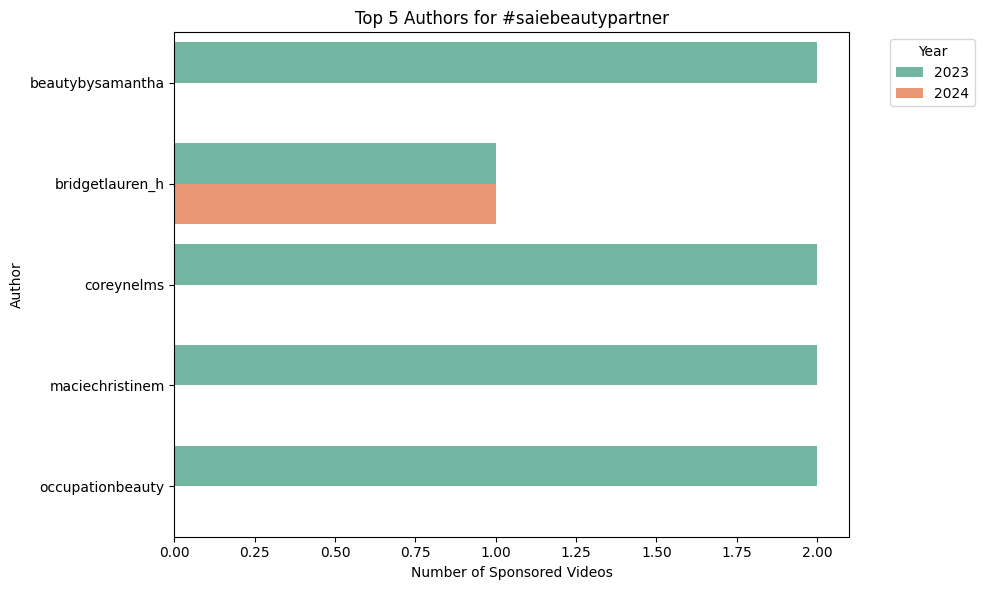

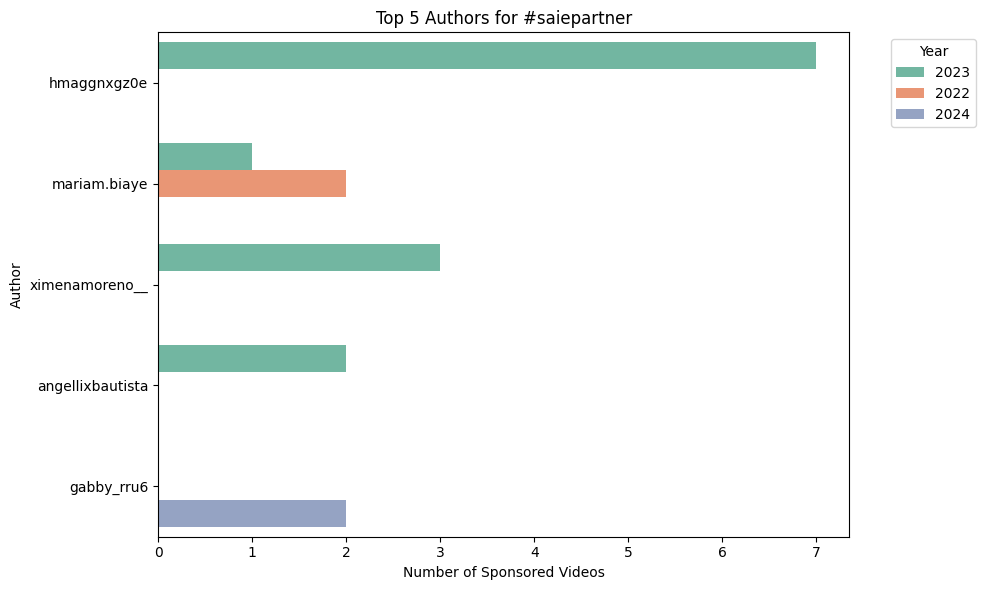

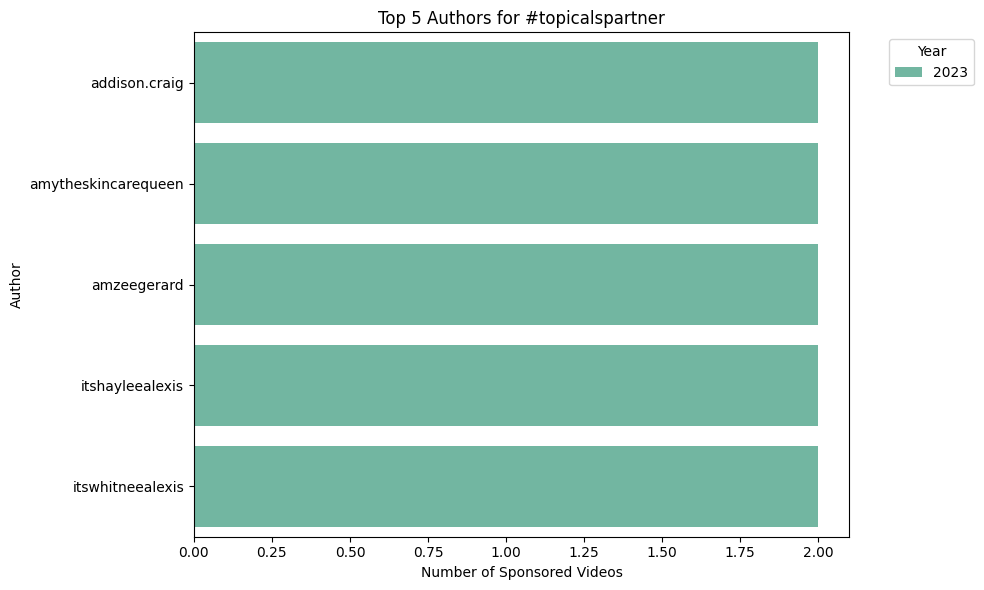

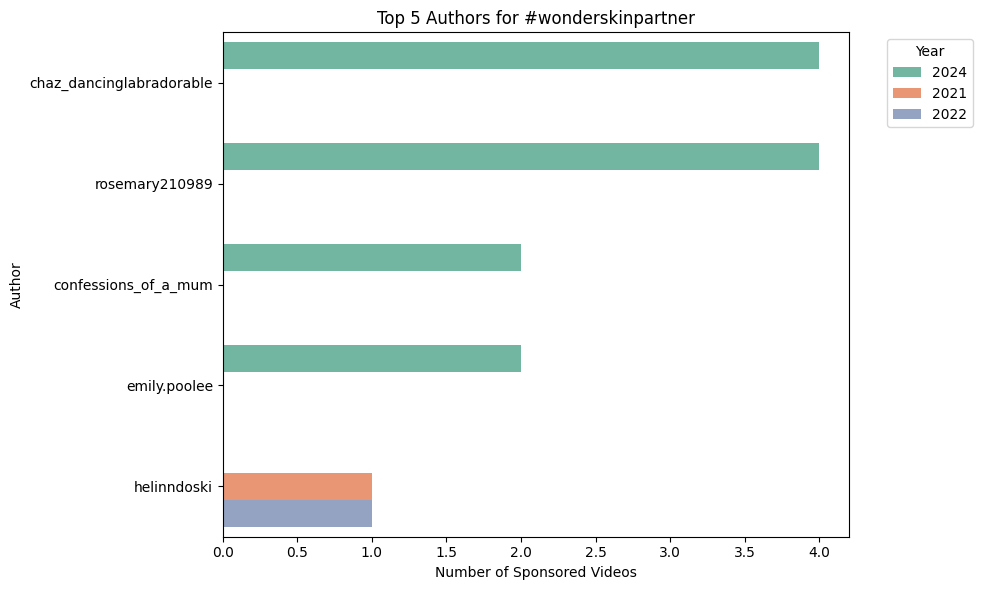

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ----------- Step 1: Load and Flatten Nested JSON -----------

json_path = '/Users/sooahnlee/Desktop/CS/soo_metadata_2020_2024.json'
csv_output_path = '/Users/sooahnlee/Desktop/CS/soo_metadata_2020_2024.csv'

with open(json_path, 'r') as f:
    nested_data = json.load(f)

flat_rows = []
for year, hashtags in nested_data.items():
    for hashtag, entries in hashtags.items():
        for entry in entries:
            entry['year'] = year
            entry['hashtag_full'] = hashtag
            # Strip trailing year for grouping
            base_hashtag = re.sub(r'_\d{4}$', '', hashtag)
            entry['hashtag'] = base_hashtag
            flat_rows.append(entry)

df = pd.DataFrame(flat_rows)
df.to_csv(csv_output_path, index=False)
print(f"✅ Flattened CSV saved to: {csv_output_path}")

# ----------- Step 2: Top 5 Authors Per Hashtag, Colored by Year -----------

# Group and count by hashtag, uniqueId, and year
grouped = (
    df.groupby(['hashtag', 'uniqueId', 'year'])
    .size()
    .reset_index(name='count')
)

# Get top 5 authors per hashtag (summing across years)
top_authors = (
    grouped.groupby(['hashtag', 'uniqueId'])['count']
    .sum()
    .reset_index()
    .sort_values(['hashtag', 'count'], ascending=[True, False])
    .groupby('hashtag')
    .head(5)
)

# Merge back to keep year info
top_authors_full = pd.merge(
    top_authors[['hashtag', 'uniqueId']],
    grouped,
    on=['hashtag', 'uniqueId'],
    how='left'
)

# ----------- Step 3: One Plot per Hashtag -----------

hashtags = top_authors_full['hashtag'].unique()

for hashtag in hashtags:
    plt.figure(figsize=(10, 6))
    data = top_authors_full[top_authors_full['hashtag'] == hashtag]

    sns.barplot(
        data=data,
        y='uniqueId',
        x='count',
        hue='year',
        palette='Set2'
    )

    plt.title(f"Top 5 Authors for #{hashtag}")
    plt.xlabel("Number of Sponsored Videos")
    plt.ylabel("Author")
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Flattened CSV saved to: /Users/sooahnlee/Desktop/CS/soo_metadata_2020_2024.csv


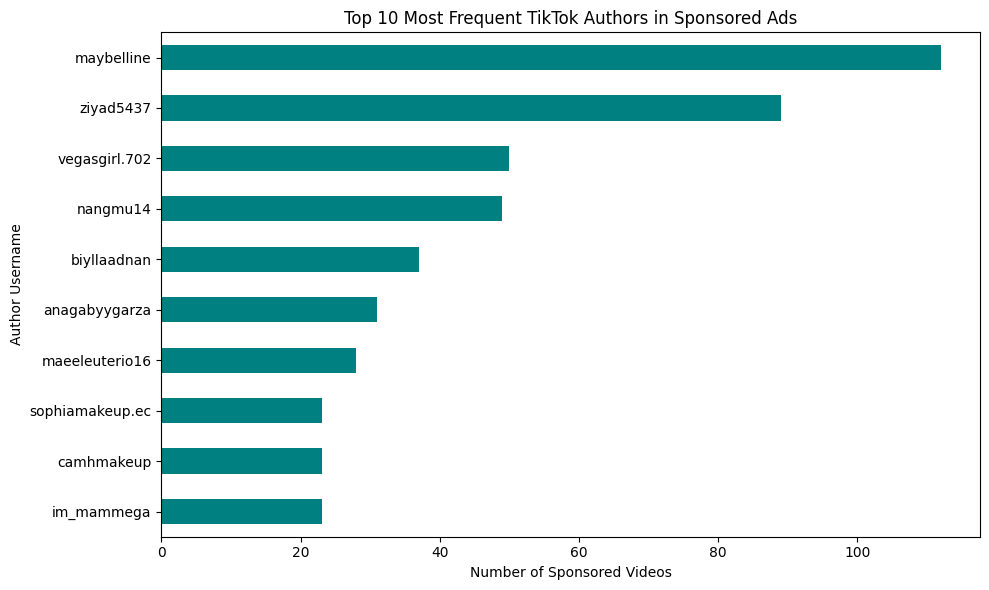

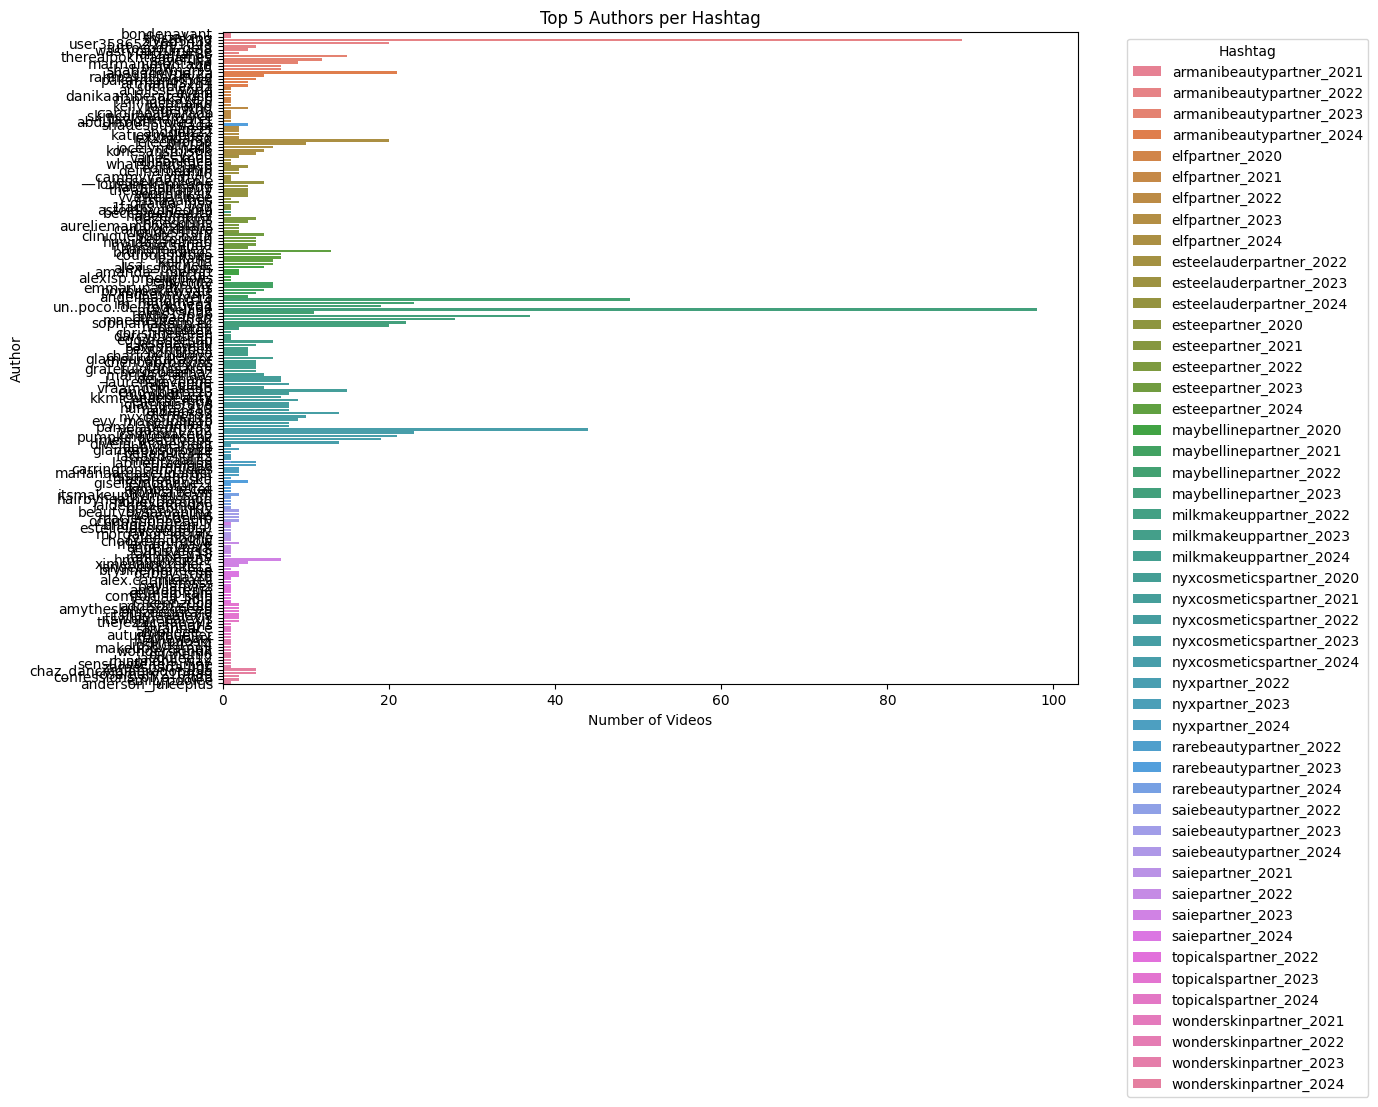

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------- Step 1: Load and Flatten Nested JSON -----------

# Update path to your enriched JSON file
json_path = '/Users/sooahnlee/Desktop/CS/soo_metadata_2020_2024.json'
csv_output_path = '/Users/sooahnlee/Desktop/CS/soo_metadata_2020_2024.csv'

with open(json_path, 'r') as f:
    nested_data = json.load(f)

# Flatten the nested structure
flat_rows = []
for year, hashtags in nested_data.items():
    for hashtag, entries in hashtags.items():
        for entry in entries:
            entry['year'] = year
            entry['hashtag'] = hashtag
            flat_rows.append(entry)

# Convert to DataFrame
df = pd.DataFrame(flat_rows)

# Save to CSV
df.to_csv(csv_output_path, index=False)
print(f"Flattened CSV saved to: {csv_output_path}")


# ----------- Step 2: Plot Top 10 Authors Overall -----------

author_counts = df['uniqueId'].value_counts()

plt.figure(figsize=(10, 6))
author_counts.head(10).plot(kind='barh', color='teal')
plt.xlabel('Number of Sponsored Videos')
plt.ylabel('Author Username')
plt.title('Top 10 Most Frequent TikTok Authors in Sponsored Ads')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# ----------- Step 3: Plot Top 5 Authors Per Hashtag -----------

# Count per (hashtag, uniqueId)
hashtag_author_counts = (
    df.groupby(['hashtag', 'uniqueId'])
    .size()
    .reset_index(name='count')
)

# For each hashtag, get top 5 authors
top_authors_per_hashtag = (
    hashtag_author_counts
    .sort_values(['hashtag', 'count'], ascending=[True, False])
    .groupby('hashtag')
    .head(5)
)

# Plot
plt.figure(figsize=(14, 10))
sns.barplot(
    data=top_authors_per_hashtag,
    y='uniqueId',
    x='count',
    hue='hashtag',
    dodge=False
)
plt.xlabel("Number of Videos")
plt.ylabel("Author")
plt.title("Top 5 Authors per Hashtag")
plt.legend(title='Hashtag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
author_videos = df[df['uniqueId'] == 'ziyad5437']

# Extract URLs
urls = author_videos['video_url'].tolist()

# Print or save
for url in urls:
    print(url)

https://www.tiktok.com/@ziyad5437/video/7140621381565287706
https://www.tiktok.com/@ziyad5437/video/7140204746757082394
https://www.tiktok.com/@ziyad5437/video/7140165637057318171
https://www.tiktok.com/@ziyad5437/video/7140165429376453915
https://www.tiktok.com/@ziyad5437/video/7138999478471707930
https://www.tiktok.com/@ziyad5437/video/7138697567235231003
https://www.tiktok.com/@ziyad5437/video/7142841721733303579
https://www.tiktok.com/@ziyad5437/video/7142672439368092955
https://www.tiktok.com/@ziyad5437/video/7145762006165998874
https://www.tiktok.com/@ziyad5437/video/7145646660083830043
https://www.tiktok.com/@ziyad5437/video/7145632593810132251
https://www.tiktok.com/@ziyad5437/video/7145516511195630874
https://www.tiktok.com/@ziyad5437/video/7145498023383141659
https://www.tiktok.com/@ziyad5437/video/7145431337867005211
https://www.tiktok.com/@ziyad5437/video/7145419728687861018
https://www.tiktok.com/@ziyad5437/video/7145329179645480219
https://www.tiktok.com/@ziyad5437/video/

In [25]:
author_videos = df[df['uniqueId'] == 'nangmu14']

# Extract URLs
urls = author_videos['video_url'].tolist()

# Print or save
for url in urls:
    print(url)

https://www.tiktok.com/@nangmu14/video/7069783606348008730
https://www.tiktok.com/@nangmu14/video/7069544134935121179
https://www.tiktok.com/@nangmu14/video/7069251256589569307
https://www.tiktok.com/@nangmu14/video/7068505153200000283
https://www.tiktok.com/@nangmu14/video/7068150018951122203
https://www.tiktok.com/@nangmu14/video/7068058623083154714
https://www.tiktok.com/@nangmu14/video/7072257564288830746
https://www.tiktok.com/@nangmu14/video/7071858764248304923
https://www.tiktok.com/@nangmu14/video/7071561311317986587
https://www.tiktok.com/@nangmu14/video/7071479634113645851
https://www.tiktok.com/@nangmu14/video/7071250809157176603
https://www.tiktok.com/@nangmu14/video/7070847478169406746
https://www.tiktok.com/@nangmu14/video/7070675062008958235
https://www.tiktok.com/@nangmu14/video/7069953189461724443
https://www.tiktok.com/@nangmu14/video/7074859484337687834
https://www.tiktok.com/@nangmu14/video/7074746182664228122
https://www.tiktok.com/@nangmu14/video/70736603235043279

In [26]:
author_videos = df[df['uniqueId'] == 'cindyibarra23']

# Extract URLs
urls = author_videos['video_url'].tolist()

# Print or save
for url in urls:
    print(url)

https://www.tiktok.com/@cindyibarra23/video/7016114671115701510
https://www.tiktok.com/@cindyibarra23/video/7015824001117293830
https://www.tiktok.com/@cindyibarra23/video/7015823490393640198
https://www.tiktok.com/@cindyibarra23/video/7015820713659534597
https://www.tiktok.com/@cindyibarra23/video/7015305860209593606
https://www.tiktok.com/@cindyibarra23/video/7015110219453762821
https://www.tiktok.com/@cindyibarra23/video/7015086334876339462
https://www.tiktok.com/@cindyibarra23/video/7015047961319099654
https://www.tiktok.com/@cindyibarra23/video/7014691102829661445
https://www.tiktok.com/@cindyibarra23/video/7014688886249000197
https://www.tiktok.com/@cindyibarra23/video/7014686992520727814
https://www.tiktok.com/@cindyibarra23/video/7014669213868576006
https://www.tiktok.com/@cindyibarra23/video/7017304168448724230
https://www.tiktok.com/@cindyibarra23/video/7017270431480597765
https://www.tiktok.com/@cindyibarra23/video/7016511490899463429


In [10]:
import requests
from bs4 import BeautifulSoup as BS
import json
import pandas as pd

In [ ]:
results = []

for comurl in paidpartnership_urls:
    print(f"Processing: {comurl}")
    req = requests.get(comurl)
    
    while req.status_code != 200:
        req = requests.get(comurl)

    soup = BS(req.content, 'html.parser')
    scripts = soup.find_all('script')

    try:
        data = json.loads(scripts[6].text)

        try:
            adAuthorization_value = data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["adAuthorization"]
        except KeyError:
            adAuthorization_value = 'NA'

        try:
            adLabelVersion_value = data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["adLabelVersion"]
        except KeyError:
            adLabelVersion_value = 'NA'
        
        result = {
            "url": comurl,
            "uniqueId": data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["author"]["uniqueId"],
            "video_id": data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["id"],
            "desc": data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["desc"],
            "locationCreated": data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["locationCreated"],
            "isAd": data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["isAd"],
            "isADVirtual": data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["author"]["isADVirtual"],  #virtual reality video?
            "ttSeller": data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["author"]["ttSeller"],
            "diversificationLabels": data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["diversificationLabels"],
            "adAuthorization": adAuthorization_value,
            "adLabelVersion": adLabelVersion_value,
            "suggestedWords": data["__DEFAULT_SCOPE__"]["webapp.video-detail"]["itemInfo"]["itemStruct"]["suggestedWords"],
        }

        results.append(result)
        print("Extracted:", result)

    except Exception as e:
        print(f"Error processing {comurl}: {e}")

df_results = pd.DataFrame(results)